In [1]:
import pandas as pd 
import scipy.interpolate
import math
import numpy as np
import sympy as sp
from math import sin, tan, cos, ceil, exp, sqrt
import forallpeople as fp
fp.environment('structural', top_level= True)
import handcalcs.render
from handcalcs import handcalc

<html>
<body>

<h2 style=";font-family:'Cambria';">
    <font size="+4"> Disen&#771;o de box culvert.
    </font>
    
</h2>
    
<p style="font-family:'Cambria';font-size:20px"> 
    

    
<b style="font-family:'Cambria';font-size:10px"> 
    <font size="+2"> Diseñadores:</font>
</b>
    
<p style="font-family:'Cambria';font-size:20px"> 
    Arrieta Yeimith
    </p>
    
<p style="font-family:'Cambria';font-size:20px"> 
    Saumeth Andres
    </p>
    
<p style="font-family:'Cambria';font-size:20px"> 
    Soler Cristian
    </p>


</body>
</html>

<html>
<body>

<h2 style=";font-family:'Cambria';">
    <font size="+3">1. Datos de Disen&#771;o</font>
    
</h2>

<p style="font-family:'Cambria';font-size:20px">
    A continuación se presentan los datos entregados por el cliente, para el diseño de un Boxculvert:
    
</p>
<p style="font-family:'Cambria';font-size:10px"> 
    <font size="+2">1.1 Datos del terreno</font>
</p>
<p style="font-family:'Cambria';font-size:20px">   </p>


</body>
</html>

In [2]:
%%render 2 params
Hrelleno = (1.5*m) # Altura de relleno
gamma = (18*kN/m**3) #Peso especifico
Phi = (28) #Ángulo de fricción
sigma_adm = (150*kN/m**2) # Esfuerzo admisible
Kb = 34500*kN/m**3  # Coeficiente de balastro

<IPython.core.display.Latex object>

<p style="font-family:'Cambria';font-size:10px"> 
    <font size="+2">1.2 Datos de la geometría</font>
</p>

In [489]:
%%render 2 params
B = (4*m)  #Ancho libre interior
H = (3*m)  #Altura libre interior
r = (7*cm) #Recubrimiento

<IPython.core.display.Latex object>

In [490]:
%%render 2 params
celdas = 2 #Número de celdas del box culvert

<IPython.core.display.Latex object>

<html>
<body>

<h2 style=";font-family:'Cambria';">
    <font size="+3">2. Predimensionamiento de la estructura.</font>
    
</h2>

<p style="font-family:'Cambria';font-size:20px">
    A continuación se presentan las cargas muertas que serán soportadas por la estructura:
    
</p>

<h2 style=";font-family:'Cambria';">
    <font size="+2">2.1 Predimensionamiento de la losa superior.</font>
    
</h2>
<p style="font-family:'Cambria';font-size:20px">
    Se predimensiona, siguiendo la tabla 2.5.2.6.3-1 del CCP-2014
    
</p>
    
</body>
</html>

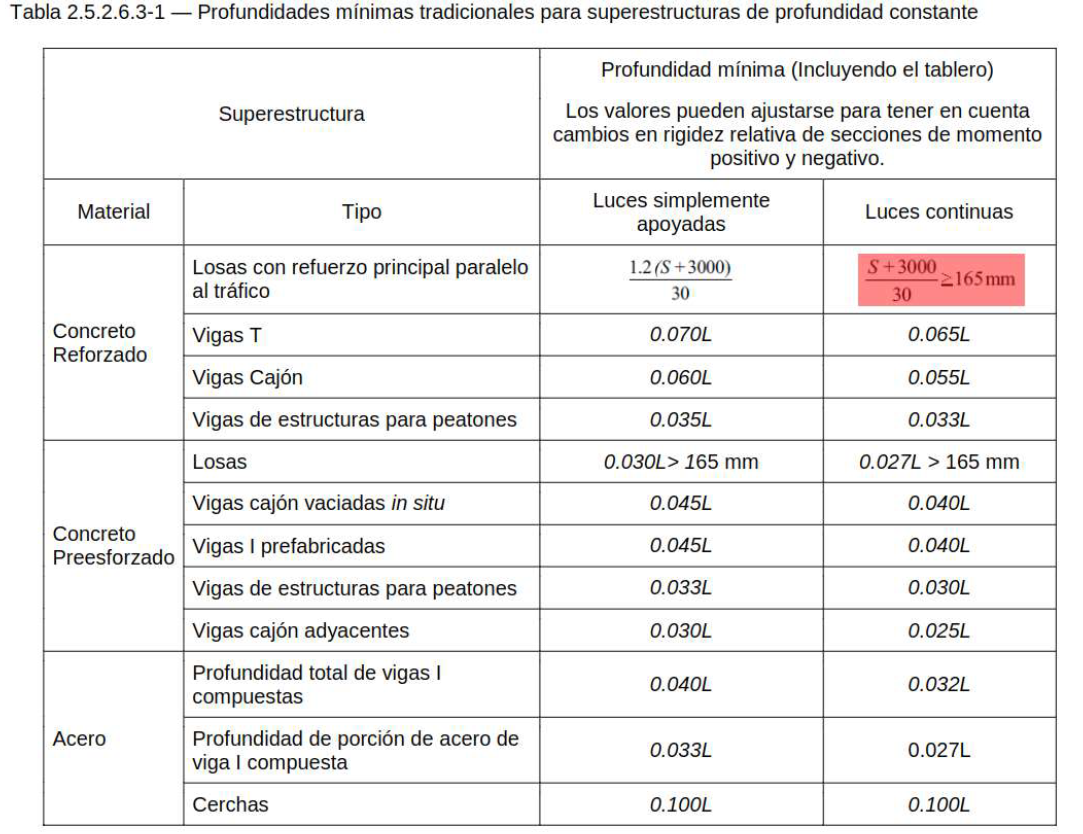

In [5]:
%%render 2
H_sup = (B+3000*mm)/30

<IPython.core.display.Latex object>

In [486]:
%%render 1

H_sup = (24*cm)

<IPython.core.display.Latex object>

<html>
<body>

<p style="font-family:'Cambria';font-size:20px">
    Luego de un primer diseño, se llegó a que la altura requerida es de:
    
</p>
    
</body>
</html>

In [485]:
%%render 1

H_sup = (30*cm)

<IPython.core.display.Latex object>

<html>
<body>

<h2 style=";font-family:'Cambria';">
    <font size="+2">2.2 Predimensionamiento de espesor de muros.</font>
    
</h2>
    
<p style="font-family:'Cambria';font-size:20px">
    Seguimos la tabla 36.5-1 del WisDOT bridge manual:
    
</p>
    
</body>
</html>

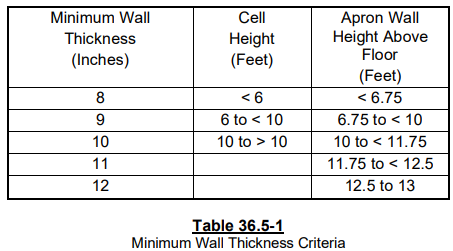

<html>
<body>
    
<p style="font-family:'Cambria';font-size:20px">
    Debido a la altura de muro de 3 metros el espesor mínimo de muro es de 9 pulgadas.
    
</p>
    
</body>
</html>

In [484]:
%%render 1
e_m = (30*cm)

<IPython.core.display.Latex object>

<html>
<body>

<h2 style=";font-family:'Cambria';">
    <font size="+2">2.3 Predimensionamiento de losa inferior.</font>
    
</h2>
    
<p style="font-family:'Cambria';font-size:20px">
    Haciendo uso de manual de diseño LFRD Bridge design:
    
</p>
    
</body>
</html>

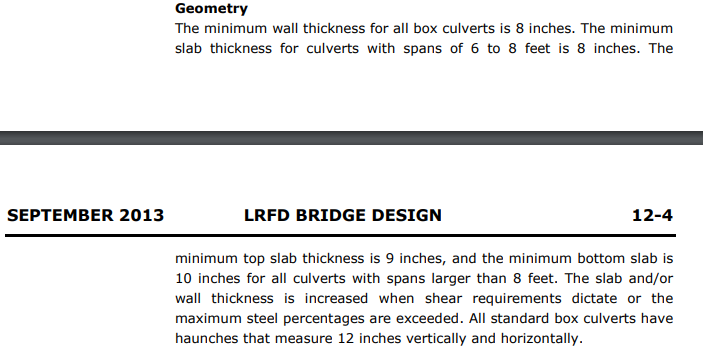

<html>
<body>
    
<p style="font-family:'Cambria';font-size:20px">
    Debido a que la luz es mayor a 8 pulgadas, la altura mínima para la losa inferior es de 10 pulgadas.
    
</p>
    
</body>
</html>

In [483]:
%%render 1

H_inf = (30*cm)

<IPython.core.display.Latex object>

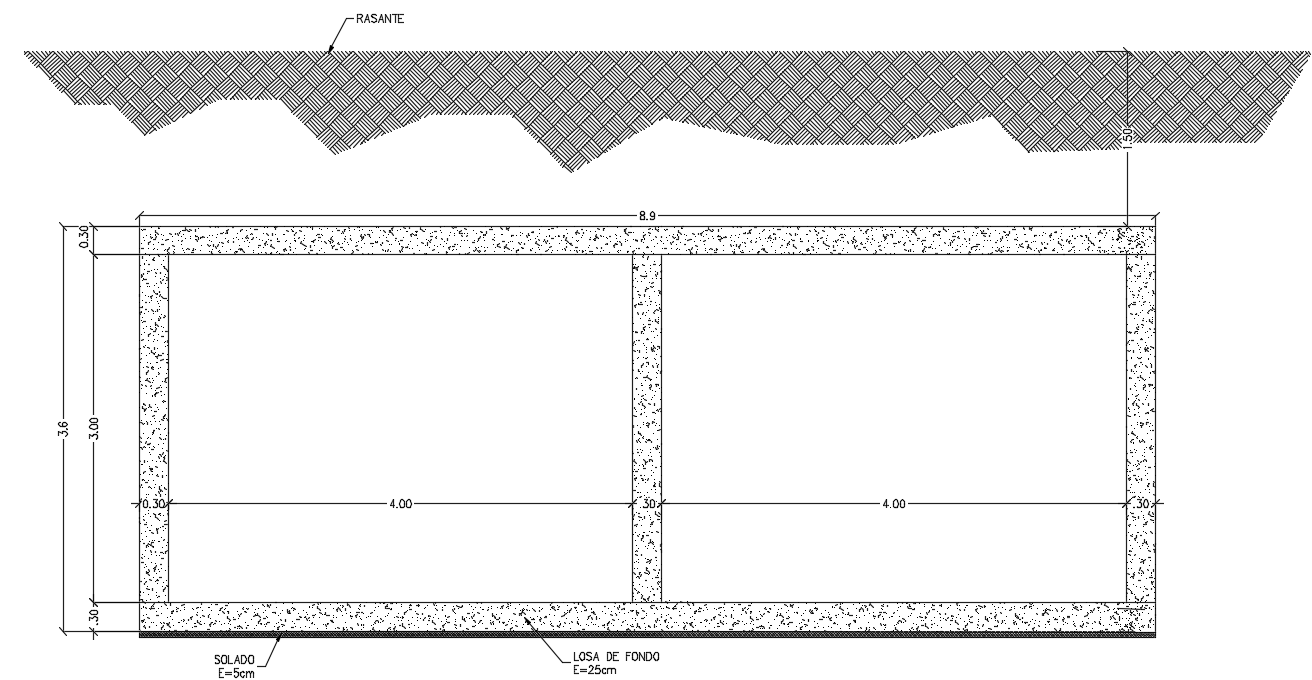

<html>
<body>

<h2 style=";font-family:'Cambria';">
    <font size="+3">3. Análisis de cargas muertas</font>
    
</h2>

<p style="font-family:'Cambria';font-size:20px">
    A continuación se presentan las cargas muertas que serán soportadas por la estructura:
    
</p>

<h2 style=";font-family:'Cambria';">
    <font size="+2">3.1 Presión horizontal de suelo</font>
    
</h2>
    
</body>
</html>

<p style="font-family:'Cambria';font-size:10px"> 
    <font size="+1">3.1.1 Coeficientes de presión</font>
</p>

In [10]:
%%render 2
K_0 = 1-sin(Phi)
K_a = tan(45-Phi/2)**2

<IPython.core.display.Latex object>

<p style="font-family:'Cambria';font-size:10px"> 
    <font size="+1">3.1.2 Presión horizontal</font>
</p>

<p style="font-family:'Cambria';font-size:10px"> 
    <font size="+1">El valor del coeficiente K se toma como el más crítico entre el coeficiente de reposo y el coeficiente activo:</font>
</p>

In [11]:
%%render 2
k = max(K_0, K_a)

<IPython.core.display.Latex object>

In [12]:
%%render 2 long
E_H_min = k*gamma*Hrelleno*1*m
E_H_max = k*gamma*(Hrelleno+H+H_sup+H_inf)*1*m


<IPython.core.display.Latex object>

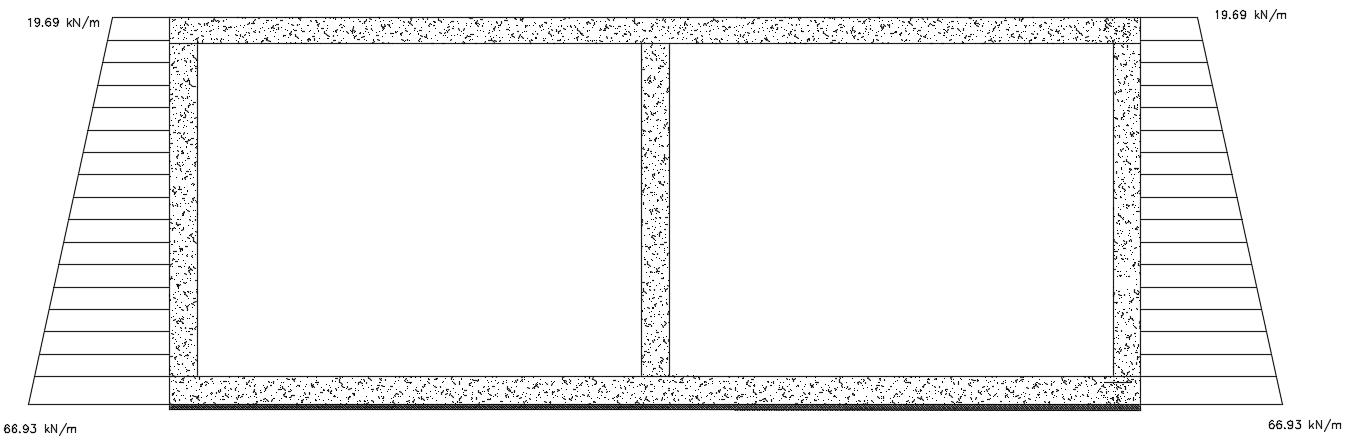

<html>
<body>


<h2 style=";font-family:'Cambria';">
    <font size="+2">3.2 Presión hidrostática</font>
    
</h2>

<p style="font-family:'Cambria';font-size:10px"> 
    <font size="+1">Se cálcula las cargas producidas por el agua:</font>
</p>

    
</body>
</html>

In [13]:
%%render 2 params
gamma_W = 9.81*kN/m**3

<IPython.core.display.Latex object>

In [14]:
%%render 2 long
P_W1 = gamma_W*H*1*m # Carga lateral de agua



<IPython.core.display.Latex object>

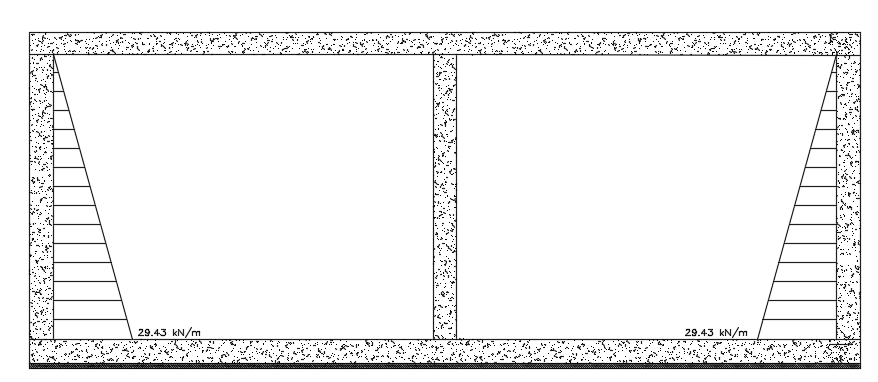

In [15]:
%%render 2
P_W2 = gamma_W*H*1*m # Carga vertical de agua

<IPython.core.display.Latex object>

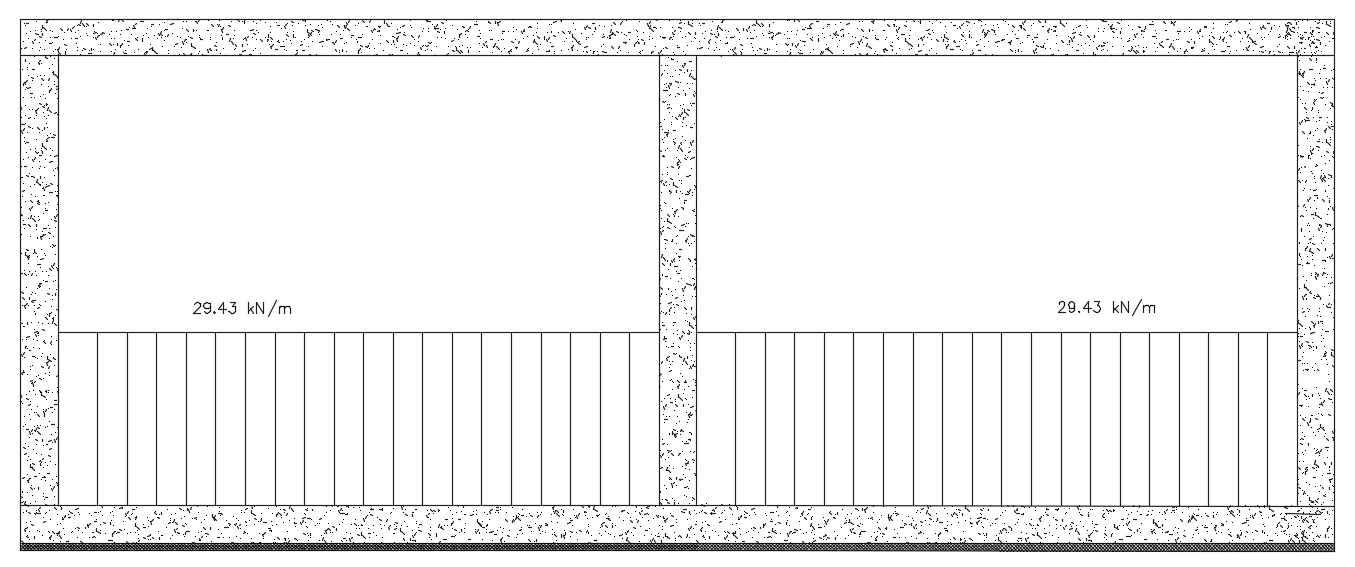

<html>
<body>


<h2 style=";font-family:'Cambria';">
    <font size="+2">3.3 Presión lateral por sobrecarga viva</font>
    
</h2>

<p style="font-family:'Cambria';font-size:10px"> 
    <font size="+1">Se determina el efecto horizontal que tiene la sobrecarga viva en la estructura:</font>
</p>

    
</body>
</html>

In [16]:
y = [1200, 900, 600]
x = [1500, 3000, 6000]

In [17]:
y_interp = scipy.interpolate.interp1d(x, y)


In [18]:
%%render 1 params
h_eq_max = y_interp(H/mm)*mm
h_eq_min = y_interp((H+Hrelleno+H_sup+H_inf)/mm)*mm

<IPython.core.display.Latex object>

In [19]:
%%render 2  
L_S_max = k*gamma*h_eq_max*1*m
L_S_min = k*gamma*h_eq_min*1*m

<IPython.core.display.Latex object>

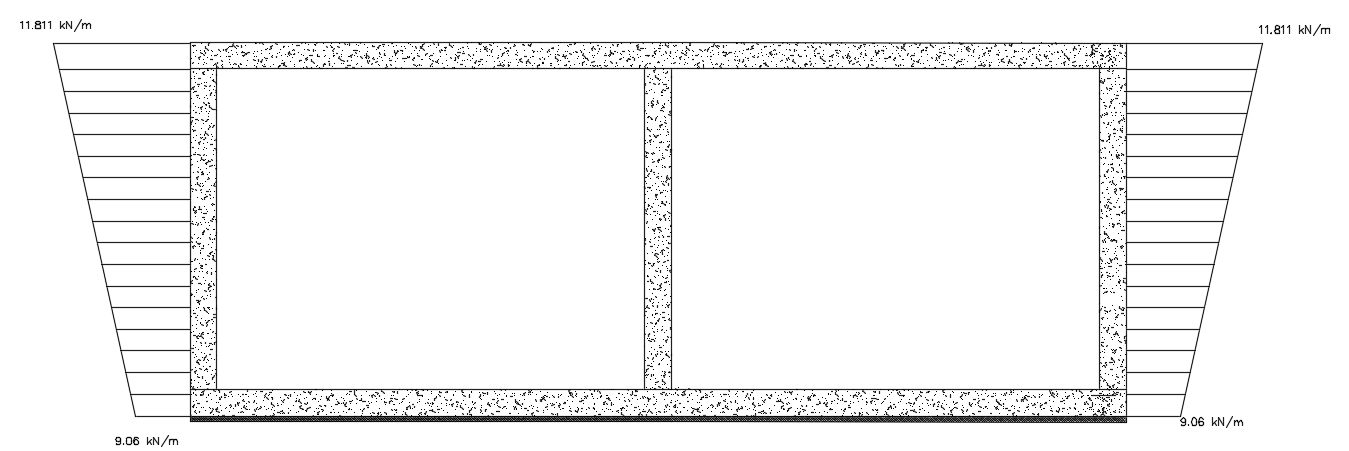

<html>
<body>


<h2 style=";font-family:'Cambria';">
    <font size="+2">3.4 Presión vertical del terreno</font>
    
</h2>

<p style="font-family:'Cambria';font-size:10px"> 
    <font size="+1">Se calcula el peso del terreno sobre la estructura, para una instalación en zanja:</font>
</p>

    
</body>
</html>

In [20]:
%%render 2 params
B_c = 2*B+3*e_m
B_d = B_c+2*m

<IPython.core.display.Latex object>

In [21]:
%%render 2 
n =  Hrelleno/B_d


<IPython.core.display.Latex object>

In [22]:
%%render 4

K_u_prime = 0.1924

<IPython.core.display.Latex object>

In [23]:
%%render 4 long

C_d = (1-exp(-2*K_u_prime*n))/(2*K_u_prime)

<IPython.core.display.Latex object>

In [24]:
%%render 2 long

F_t = (C_d*B_d**2)/(Hrelleno*B)

F_e = 1+0.2*Hrelleno/B

<IPython.core.display.Latex object>

In [25]:
%%render 2

E_V = F_e*gamma*Hrelleno*1*m

<IPython.core.display.Latex object>

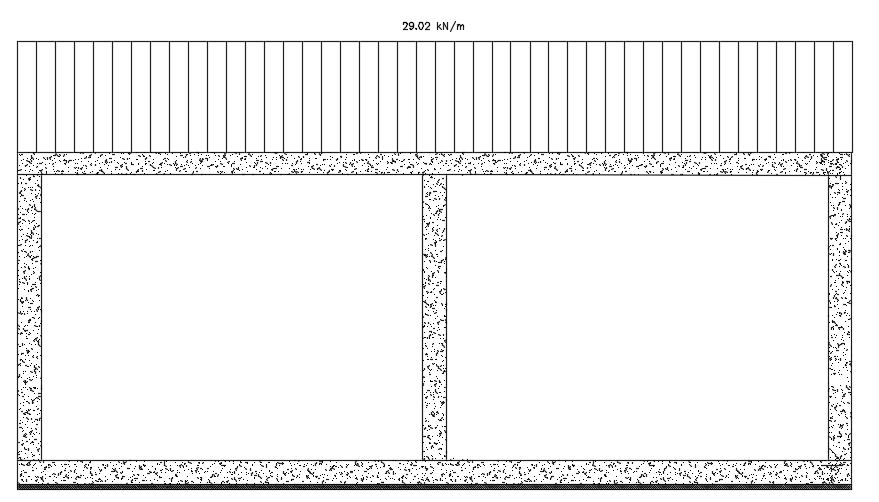

<html>
<body>

<h2 style=";font-family:'Cambria';">
    <font size="+3">4. Análisis de cargas vivas</font>
    
</h2>

<p style="font-family:'Cambria';font-size:20px">
    A continuación se presentan las cargas vivas que serán soportadas por la estructura:
    
</p>

<h2 style=";font-family:'Cambria';">
    <font size="+2">4.1 Distribución de la carga viva montada en la parte superior</font>
    
</h2>
    
<p style="font-family:'Cambria';font-size:10px"> 
    <font size="+1">4.1.1 Tráfico transversal al tramo.</font>
</p>
    
</body>
</html>

In [26]:
%%render 3

S_w = (1828*mm)


<IPython.core.display.Latex object>

In [27]:
%%render 1
W_t = (500*mm)
D_i = B

<IPython.core.display.Latex object>

In [28]:
%%render 2

LLDF = 1.15

<IPython.core.display.Latex object>

In [29]:
%%render 1
H_int_t = (S_w-W_t-0.06*D_i)/LLDF

<IPython.core.display.Latex object>

<html>
<body>
    
<p style="font-family:'Cambria';font-size:10px"> 
    <font size="+1">4.1.2 Área de distribución para Tandem.</font>
</p>
    
</body>
</html>

In [30]:
%%render 2 long
W_w = W_t+S_w+LLDF*Hrelleno+0.06*D_i
L_t = (250*mm)
S_at = (1.2*m)
L_w = L_t+S_at+LLDF*Hrelleno

A_ll =L_w*W_w

IM = 33*(1-4.1e-4/mm*Hrelleno)  #Amplificación dinámica.

m1 = 1.2   #Factor de presencia múltiple.

<IPython.core.display.Latex object>

In [31]:
IM = IM/100

In [32]:
%%render 2

PL_t = (125*kN*(1+IM)*m1)/A_ll*1*m

<IPython.core.display.Latex object>

<html>
<body>
    
<p style="font-family:'Cambria';font-size:10px"> 
    <font size="+1">4.1.3 Área de distribución para Camión.</font>
</p>
    
</body>
</html>

In [33]:
%%render 2 long
W_w = W_t+S_w+LLDF*Hrelleno+0.06*D_i
L_t = (250*mm)
S_ac = (4.3*m)
L_w = L_t+S_ac+LLDF*Hrelleno

A_ll =L_w*W_w

IM = 33*(1-4.1e-4/mm*Hrelleno)  #Amplificación dinámica.

m1 = 1.2   #Factor de presencia múltiple.

<IPython.core.display.Latex object>

In [34]:
IM = IM/100

In [35]:
%%render 2

PL_c = (160*kN*(1+IM)*m1)/A_ll*1*m

<IPython.core.display.Latex object>

<html>
<body>
    
<p style="font-family:'Cambria';font-size:10px"> 
    <font size="+1"> Finalmente, se escoge el mayor resultado, para la carga viva.</font>
</p>
    
</body>
</html>

In [36]:
%%render 2
PL = max(PL_t,PL_c)

<IPython.core.display.Latex object>

<html>
<body>

<h2 style=";font-family:'Cambria';">
    <font size="+3">5. Análisis estructural mediante SAP2000</font>
    
</h2>

<p style="font-family:'Cambria';font-size:20px">
    Es necesario modelar las cargas obtenidas en el programa de SAP2000, para determinar los esfuerzos soportados por la estructura.
    
</p>

<h2 style=";font-family:'Cambria';">
    <font size="+2">5.1 Resumen de cargas</font>
    
</h2>
    
<p style="font-family:'Cambria';font-size:10px"> 
    <font size="+1"> Para ingresar los datos, se organizan los mismos dentro de una tabla.</font>
</p>
    
</body>
</html>

In [37]:
resumen = pd.DataFrame(columns=['Cargas'], index=['Ev', 'EH(min)', 'EH(max)',
                                                  'WA1','WA2', 'Ls(min)', 'Ls(max)', 'PL'])
resumen.iloc[0,0] = E_V
resumen.iloc[1,0] = E_H_min
resumen.iloc[2,0] = E_H_max
resumen.iloc[3,0] = P_W1
resumen.iloc[4,0] = P_W2
resumen.iloc[5,0] = L_S_min
resumen.iloc[6,0] = L_S_max
resumen.iloc[7,0] = PL
resumen

,Cargas
Ev,29.025 kN/m
EH(min),19.686 kN/m
EH(max),66.931 kN/m
WA1,29.430 kN/m
WA2,29.430 kN/m
Ls(min),9.055 kN/m
Ls(max),11.811 kN/m
PL,12.403 kN/m


<html>
<body>

<h2 style=";font-family:'Cambria';">
    <font size="+2">5.2 Análisis de resortes.</font>
    
</h2>
    
<p style="font-family:'Cambria';font-size:10px"> 
    <font size="+1"> Para obtener datos más confiables, se necesita modelar el programa apoyado en una cama de resortes; por lo cual es necesario calcular los coeficientes de los resortes a utilizar.</font>
</p>
    
</body>
</html>

In [38]:
%%render 2
Kb
Phi

<IPython.core.display.Latex object>

<html>
<body>
    
<p style="font-family:'Cambria';font-size:10px"> 
    <font size="+1"> Se separó la base en 26 nodos, 24 nodos interiores y 2 exteriores, con esto podemos calcular el ancho aferente de cada nodo.</font>
</p>
    
</body>
</html>

In [39]:
%%render 2 params
L_cc = 8.6*m #Longitud de centro a centro.

N_nodos = 15 #Número de nodos.



<IPython.core.display.Latex object>

In [40]:
%%render 2 short
Ancho_int = L_cc/N_nodos#Ancho aferente de los resortes interiores
A_int = Ancho_int*1*m

<IPython.core.display.Latex object>

In [41]:
%%render 2 short
Ancho_ext = Ancho_int/2 #Ancho aferente de los resortes interiores


<IPython.core.display.Latex object>

In [42]:
%%render 2

A_ext = Ancho_ext*1*m

<IPython.core.display.Latex object>

In [43]:
%%render 2 params

A_ext = (A_ext/(1000000*mm**2))*cm**2

<IPython.core.display.Latex object>

In [44]:
resortes = pd.DataFrame(columns=['Ancho', 'Largo', 'Área', 'KSv', 'KSh'], index=['int', 'Ext'])

resortes.iloc[0,0] = Ancho_int
resortes.iloc[0,1] = 1*m
resortes.iloc[0,2] = A_int
resortes.iloc[0,3] = resortes.iloc[0,2]*Kb
resortes.iloc[0,4] = resortes.iloc[0,3]*(1-sin(Phi))

resortes.iloc[1,0] = Ancho_ext
resortes.iloc[1,1] = 1*m
resortes.iloc[1,2] = A_ext
resortes.iloc[1,3] = resortes.iloc[1,2]*Kb
resortes.iloc[1,4] = resortes.iloc[1,3]*(1-sin(Phi))


resortes

,Ancho,Largo,Área,KSv,KSh
int,573.333 mm,1.000 m,573333.333 mm²,19.780 MN/m,14.421 MN/m
Ext,286.667 mm,1.000 m,0.287 cm²,989.000 N/m,721.074 N/m


<html>
<body>

<h2 style=";font-family:'Cambria';">
    <font size="+2">5.3 Análisis estructural.</font>
    
</h2>
    
<p style="font-family:'Cambria';font-size:10px"> 
    <font size="+1"> Se introducen las cargas mayoradas dentro del programa de SAP2000 para obtener los momentos últimos de diseño.</font>
</p>
    
</body>
</html>

<html>
<body>
    
<p style="font-family:'Cambria';font-size:10px"> 
    <font size="+1">5.3.1 Análisis de cargas en servicio.</font>
</p>
    
<p style="font-family:'Cambria';font-size:10px"> 
    <font size="+1"> Se toman las cargas en estado de servicio tomando los valores máximos para positivos y negativos.</font>
</p>
    
</body>
</html>

<html>
<body>
    
<p style="font-family:'Cambria';font-size:10px"> 
    <font size="+0">5.3.1.1 Diagrama de cortante para cargas de servicio (kN).</font>
</p>
    
</body>
</html>

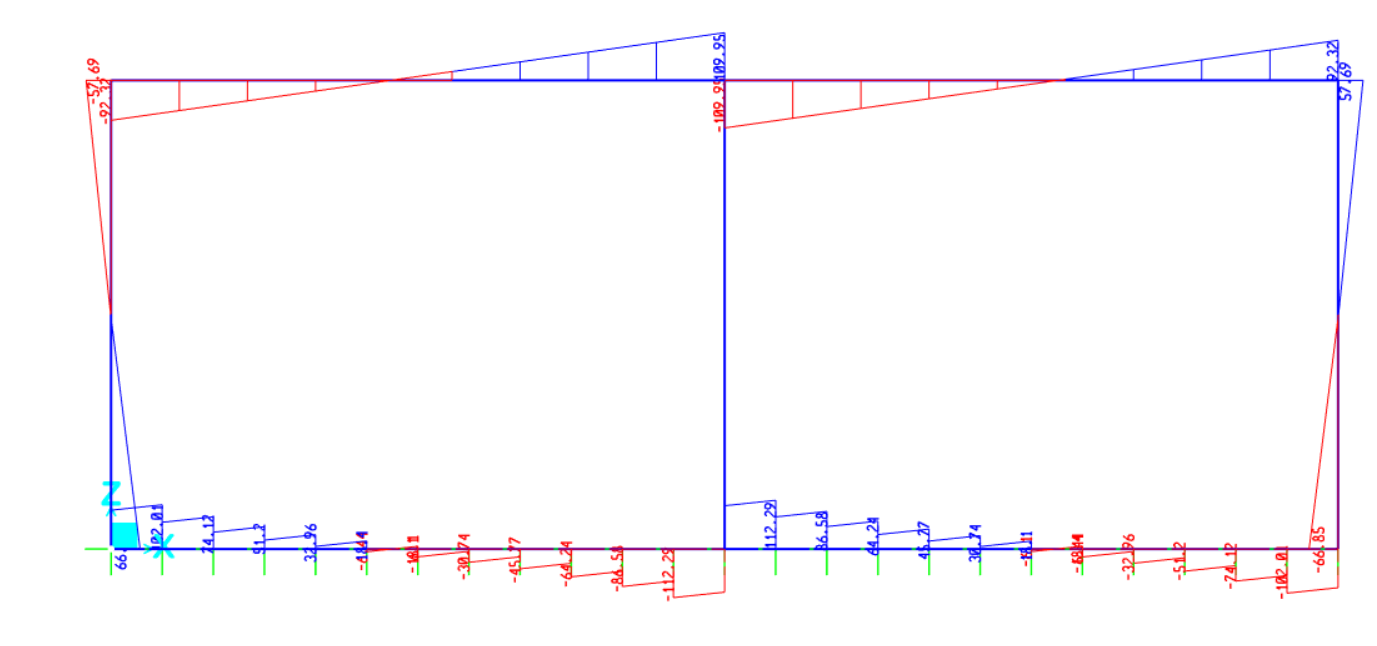



In [45]:
V_s = 103.518*kN
V_i = 117.12*kN
V_m_ext = 61.21*kN
V_m_int = 35.4*kN

In [46]:
VServicio = pd.DataFrame(columns=['Cortante'], index=['Losa Sup.', 'Losa Inf.', 'Muro. Ext.', 'Muro. Int.'])

VServicio.iloc[0,0] = V_s
VServicio.iloc[1,0] = V_i
VServicio.iloc[2,0] = V_m_ext
VServicio.iloc[3,0] = V_m_int

VServicio

,Cortante
Losa Sup.,103.518 kN
Losa Inf.,117.120 kN
Muro. Ext.,61.210 kN
Muro. Int.,35.400 kN


<html>
<body>
    
<p style="font-family:'Cambria';font-size:10px"> 
    <font size="+0">5.3.1.2 Diagrama de Momentos para cargas de servicio (kN-m).</font>
</p>
    
</body>
</html>

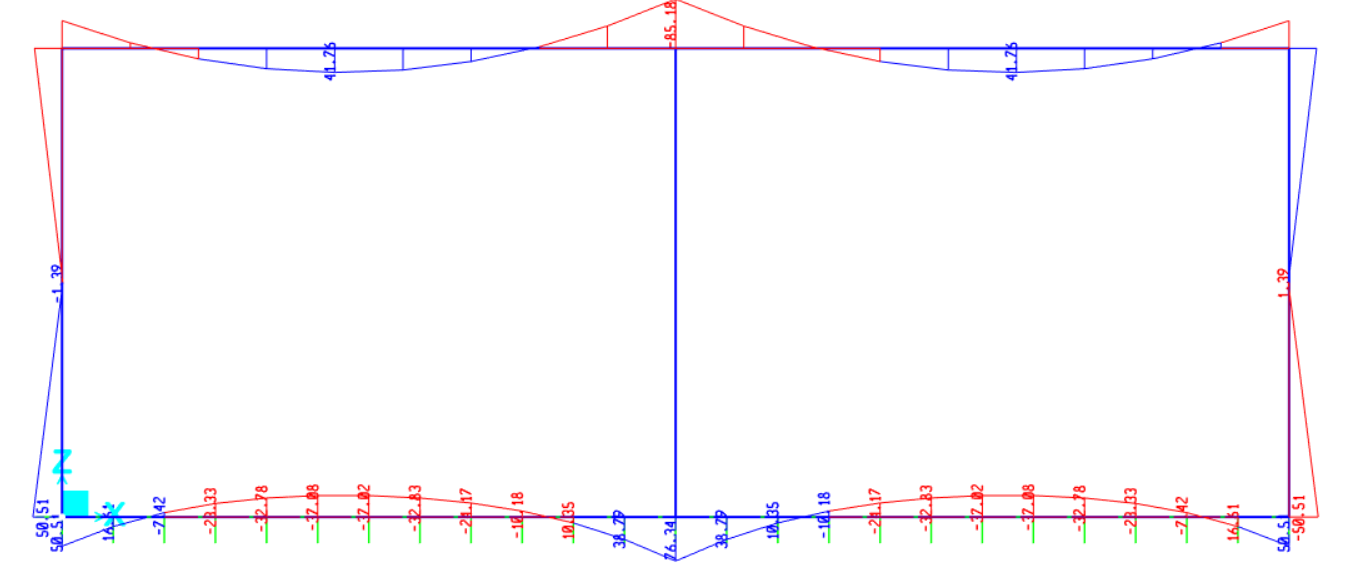

In [47]:
# M_ls_pos = 42.27*km1*m

M_ls_pos = 45.38*kN*m

M_li_pos = 90.046*kN*m

M_mExt_pos = 66.88*kN*m

M_mInt_pos = 9*kN*m

M_ls_neg = 91.964*kN*m

M_li_neg = 45.35*kN*m

M_mExt_neg = 13.35*kN*m

M_mInt_neg = 16.2*kN*m


In [48]:
MServicio = pd.DataFrame(columns=['M(+)', 'M(-)'], index=['Losa Sup.', 'Losa Inf.', 'Muros. Ext.', 'Muro. Int.'])

MServicio.iloc[0, 0] = M_ls_pos
MServicio.iloc[1, 0] = M_li_pos
MServicio.iloc[2, 0] = M_mExt_pos
MServicio.iloc[3, 0] = M_mInt_pos

MServicio.iloc[0, 1] = M_ls_neg
MServicio.iloc[1, 1] = M_li_neg
MServicio.iloc[2, 1] = M_mExt_neg
MServicio.iloc[3, 1] = M_mInt_neg

MServicio

,M(+),M(-)
Losa Sup.,45.380 kN·m,91.964 kN·m
Losa Inf.,90.046 kN·m,45.350 kN·m
Muros. Ext.,66.880 kN·m,13.350 kN·m
Muro. Int.,9.000 kN·m,16.200 kN·m


<html>
<body>
    
<p style="font-family:'Cambria';font-size:10px"> 
    <font size="+0">5.3.1.3 Factores de mayoración.</font>
</p>
    
<p style="font-family:'Cambria';font-size:10px"> 
    <font size="+1"> Se presentan los factores de mayoración utilizados en el calculo de los momentos últimos.</font>
</p>
    
</body>
</html>

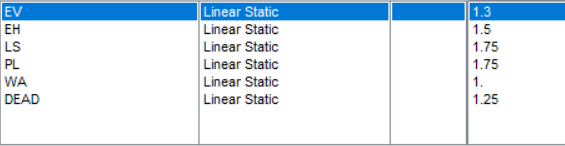

<html>
<body>
    
<p style="font-family:'Cambria';font-size:10px"> 
    <font size="+0">5.3.1.4 Diagrama de Cortantes para cargas últimas (kN).</font>
</p>
    
</body>
</html>

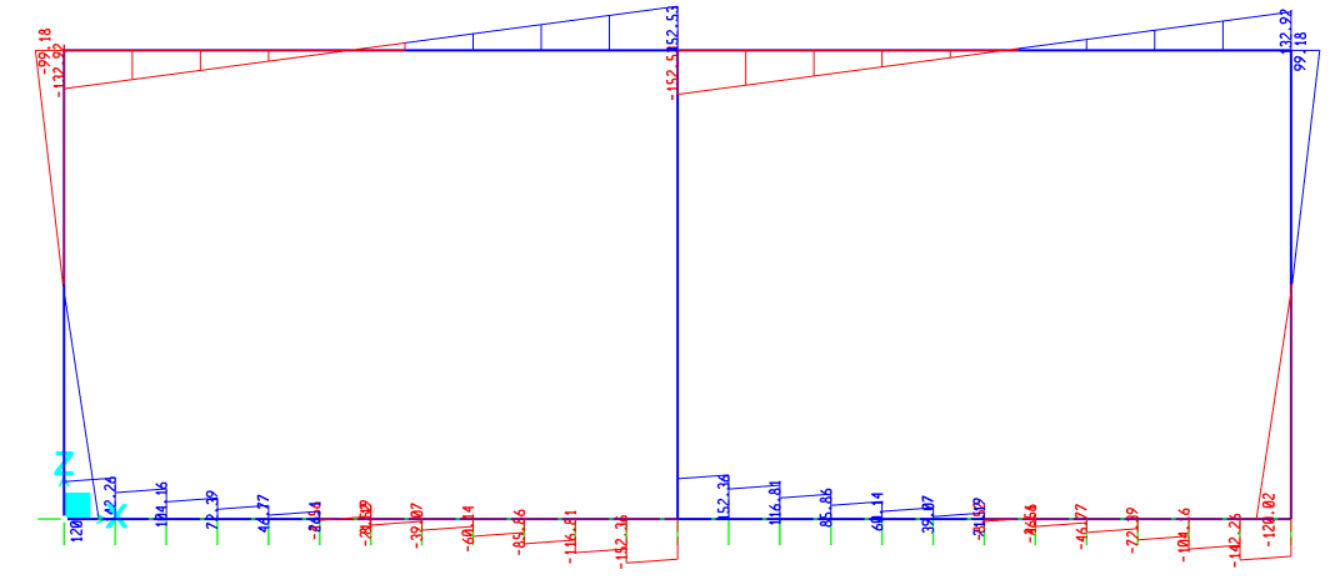

In [49]:
Vu_s = 143.053*kN
Vu_i = 165.71*kN
Vu_Mext = 85.3*kN
Vu_Mint = 53.01*kN

In [50]:
VUltimo = pd.DataFrame(columns=['Cortante'], index=['Losa Sup.', 'Losa Inf.', 'Muros. Ext.', 'Muro. Int.'])

VUltimo.iloc[0, 0] = Vu_s
VUltimo.iloc[1, 0] = Vu_i
VUltimo.iloc[2, 0] = Vu_Mext
VUltimo.iloc[3, 0] = Vu_Mint

VUltimo

,Cortante
Losa Sup.,143.053 kN
Losa Inf.,165.710 kN
Muros. Ext.,85.300 kN
Muro. Int.,53.010 kN


<html>
<body>
    
<p style="font-family:'Cambria';font-size:10px"> 
    <font size="+0">5.3.1.5 Diagrama de Momentos para cargas últimas (kN-m).</font>
</p>
    
</body>
</html>

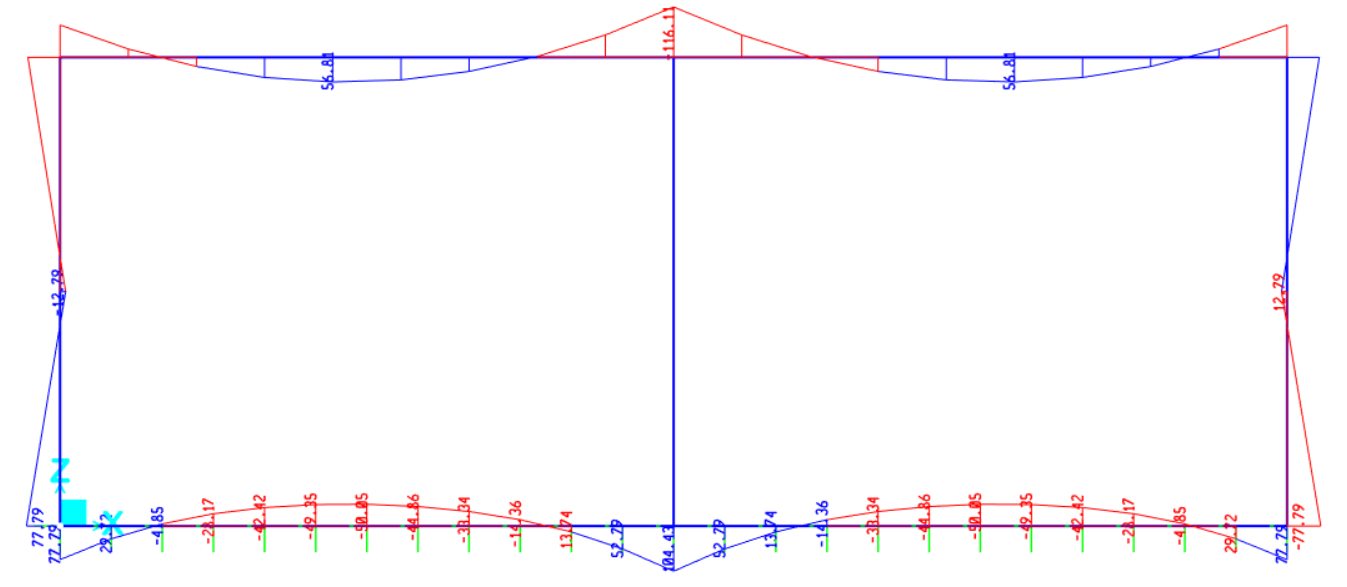

In [51]:
M_uLs_pos = 63.61*kN*m

M_uLi_pos = 120.16*kN*m

M_uMext_pos = 97.55*kN*m

M_uMint_pos = 15.42*kN*m

M_uLs_neg = 128.215*kN*m

M_uLi_neg = 60.15*kN*m

M_uMext_neg = 25.32*kN*m

M_uMint_neg = 28.346*kN*m

In [52]:
MUltimo = pd.DataFrame(columns=['M(+)', 'M(-)'], index=['Losa Sup.', 'Losa Inf.', 'Muros. Ext.', 'Muro. Int.'])

MUltimo.iloc[0,0] = M_uLs_pos
MUltimo.iloc[1,0] = M_uLi_pos
MUltimo.iloc[2,0] = M_uMext_pos
MUltimo.iloc[3,0] = M_uMint_pos

MUltimo.iloc[0,1] = M_uLs_neg
MUltimo.iloc[1,1] = M_uLi_neg
MUltimo.iloc[2,1] = M_uMext_neg
MUltimo.iloc[3,1] = M_uMint_neg
MUltimo

,M(+),M(-)
Losa Sup.,63.610 kN·m,128.215 kN·m
Losa Inf.,120.160 kN·m,60.150 kN·m
Muros. Ext.,97.550 kN·m,25.320 kN·m
Muro. Int.,15.420 kN·m,28.346 kN·m


<html>
<body>

<h2 style=";font-family:'Cambria';">
    <font size="+3">6. Diseño estructural.</font>
    
</h2>

<p style="font-family:'Cambria';font-size:20px">
    Una vez teniendo los momentos se procede a realizar el diseño a flexión de la estructura.
    
</p>


    
</body>
</html>

In [53]:
# aceros =[0.375, 0.500, 0.625,0.750, 0.875, 1.000, 1.125, 1.250, 1.375, 1.750, 2.25]
# nombres = ['N3','N4','N5','N6','N7','N8','N9','N10','N11','N14','N18']

In [54]:
aceros ={'N3':0.375, 'N4':0.500, 'N5':0.625, 'N6':0.750, 'N7':0.875, 'N8':1.000, 'N9':1.125, 'N10':1.250, 'N11':1.375, 'N14':1.750, 'N18':2.25}
# nombres = ['N3','N4','N5','N6','N7','N8','N9','N10','N11','N14','N18']

In [55]:
class losa:
    # @handcalc(jupyter_display=True)
    def cuantia(self, s):
        varilla = input('Varilla ')
        aceros[varilla]

        area = np.pi/4*(aceros[varilla]*2.54)**2
        separacion = s
        numero_barras = ceil(1/s)
        barra = varilla
        A_s = numero_barras*area
                
        colocar = str(1) + barra +"c/" + str(separacion)
        
        return colocar, separacion, A_s, numero_barras
    
#     def losa(self, Mu, Asmin, db ):
#         if f_prime_c<28:
#             Beta_1=0.85
#         elif f_prime_c<55:
#             Beta_1=0.85-0.005*(f_prime_c-28)/7
#         else:
#             Beta_1=0.65
        
        
#         rho_max = 0.85*Beta_1*f_prime_c/f_y*(3/8)
#         A_smax = rho_max*1*m*d
#         M_max = 0.9*A_smax*f_y+(d-(A_smax*f_y/(2*0.85*0.9*1*m*f_prime_c)))
#         A_b = np.pi*db**2/4
        
# #         Mu=Mu/1000
#         if Mu > M_max:
#             print('Aumentar altura de losa')
#         else:
#             As=0.85*bl*d*fc/fy*(1-(1-2*Mu/(0.85*0.9*bl*fc*d**2))**0.5)
#             As=max(As,Asmin)
#             Sb=A_b/As*1*m
#             print('As = %5.2f cm2' %(As/cm**2))
#             print('Colocar barras #',4,'cada', floor(Sb), 'cm')
#             Vl=fiv*fc**0.5/d*bl*d
#             print('Vl = %5.2f KN' %(Vl/(KN)))

    def temperatura(self, ):
        pass


<html>
<body>

<h2 style=";font-family:'Cambria';">
    <font size="+2">6.1 Diseño para Momento positivo en losa superior.</font>
    
</h2>
    
</body>
</html>

<html>
<body>
    
<h2 style="font-family:'Cambria';">
    <font size="+1">6.1.1 Cuantía mínima de acero.</font>
</h2>

<p style="font-family:'Cambria';font-size:20px">
    Se determinan los parámetros requeridos para realizar el cálculo del momento para la cuantía mínima.
</p>

</body>
</html>

In [56]:
%%render 2 params
f_prime_c = (28*MPa)
f_y = (420*MPa)
rec = (7*cm)
phi = 0.9
b = (1*m) 
d = H_sup - rec

<IPython.core.display.Latex object>

In [57]:
%%render 2 short
R_n = M_uLs_pos/(phi*b*d**2)

<IPython.core.display.Latex object>

In [58]:
%%render 6 short
rho = ((0.85*f_prime_c)/f_y)*(1-sqrt(1-(2*R_n)/(0.85*f_prime_c)))

<IPython.core.display.Latex object>

<!DOCTYPE html>
<html>
<body>
    
<h1 style=";font-family:'Cambria';">
    <font size="+0">6.1.1.1 Cálculo del módulo de sección para losa.</font>
</h1>

</body>
</html>

In [59]:
%%render 2
f_r = 0.62*sqrt(f_prime_c)*MPa
E_c = 4800*sqrt(f_prime_c)*MPa
E_s = (200e3*MPa)
S_c = (b*H_sup**2)/6

<IPython.core.display.Latex object>

<!DOCTYPE html>
<html>
<body>
     
<h1 style=";font-family:'Cambria';">
    <font size="+0">6.1.1.2. Especificación de valores de gamma.</font>
</h1>

</body>
</html>

In [60]:
%%render 2 
gamma_1 = 1.6  # Factor de variación de la fisuración por flexión. 
gamma_2 = 0    # Factor de variación del preesfuerzo.
gamma_3 = 0.67 # Relación entre la resistencia especificada a fluencia y la resistencia última a tracción del refuerzo.

<IPython.core.display.Latex object>

<!DOCTYPE html>
<html>
<body>
     
<h1 style=";font-family:'Cambria';">
    <font size="+0">6.1.1.3. Verificación del criterio de cumplimiento</font>
</h1>

</body>
</html>

In [61]:
%%render 2
verificacion = 1.33*M_uLs_pos

<IPython.core.display.Latex object>

In [62]:
%%render 2 short
Mcr = gamma_3*((gamma_1*f_r)*S_c)

<IPython.core.display.Latex object>

In [63]:
 M_min = min(Mcr, verificacion)

In [64]:
%%render
if M_min <= M_uLs_pos: condicion = f'{M_min}\quad --> \quad Cumple'
elif M_min > M_uLs_pos: condicion = f'{M_min} --> \quad No\quad cumple'; M_min

<IPython.core.display.Latex object>

In [65]:
%%render 2 short

R_nmin = M_uLs_pos/(phi*b*d**2)

<IPython.core.display.Latex object>

In [66]:
%%render 6 short

rho_min = ((0.85*f_prime_c)/f_y)*(1-sqrt(1-(2*R_nmin)/(0.85*f_prime_c)))

<IPython.core.display.Latex object>

In [67]:
%%render 2 short

A_smin = rho_min*1*m*d

<IPython.core.display.Latex object>

<html>
<body>
    
<h2 style="font-family:'Cambria';">
    <font size="+1">6.1.1.4. Cálculo de cantidad de acero.</font>
</h2>

<p style="font-family:'Cambria';font-size:20px">
    Habiendo realizado la verificación; se calcula la cantidad de acero necesaria para soportar el momento último.
    
</p>

</body>
</html>

In [68]:
%%render 4
A_s = rho*b*d


<IPython.core.display.Latex object>

In [69]:
%%render 2 params
A_s = A_s/cm**2*cm**2

<IPython.core.display.Latex object>

<!DOCTYPE html>
<html>
<body>
    
<h2 style="font-family:'Cambria';">
    <font size="+1">6.1.1.5. Configuración de aceros.</font>
</h2>

</body>
</html>

In [70]:
p = losa()
f =p.cuantia(0.15)

Varilla N5


In [71]:
%%render 2 params

A_s = f[2]*cm**2

separacion = f[1]*m

N_barras = f[3]

<IPython.core.display.Latex object>

In [72]:
%%render params

colocar = f[0]

<IPython.core.display.Latex object>

In [73]:
%%render 1
a = A_s*f_y/(0.85*f_prime_c*b)

<IPython.core.display.Latex object>

In [74]:
a = a/cm

In [75]:
%%render
a = (a*cm)

<IPython.core.display.Latex object>

<html>
<body>
    
<h2 style="font-family:'Cambria';">
    <font size="+1">6.1.1.6. Control de agrietamiento.</font>
</h2>
    
<p style="font-family:'Cambria';font-size:20px">
    Se verifica que el acero no tenga una separación muy grande, esto buscando evitar agrietamientos en la losa del puente.
    
</p>

</body>
</html>

In [76]:
%%render 2 params
gamma_e = (0.75)   # Factor de exposición
d_c = (rec)        # Espesor de recubrimiento de conctreto.
h = (H_sup)          # Altura de la losa
n = (E_s/E_c)       # Factor modular de acero

<IPython.core.display.Latex object>

In [77]:
x = sp.Symbol('x')

<html>
<body>
     
<h1 style=";font-family:'Cambria';">
    <font size="+0">6.1.1.7. Determinación del momento de inercia.</font>
</h1>
​
</body>
</html>

In [78]:
%%render 2 
x = sp.nsolve((float(b/cm)*x**2)/2+float(A_s)*x-n*float(A_s)*d,x,0)

<IPython.core.display.Latex object>

In [79]:
x = float(x)

In [80]:
%%render 2
x = (x*cm)

<IPython.core.display.Latex object>

In [81]:
%%render 
y_t = d-x

<IPython.core.display.Latex object>

In [82]:
%%render
I = (b*(x)**3)/3+n*A_s*(d-x)**2

<IPython.core.display.Latex object>

In [83]:
%%render
I = (I/cm**4*cm**4)

<IPython.core.display.Latex object>

In [84]:
agrietamiento = MServicio.iloc[:,0:1]
agrietamiento

,M(+)
Losa Sup.,45.380 kN·m
Losa Inf.,90.046 kN·m
Muros. Ext.,66.880 kN·m
Muro. Int.,9.000 kN·m


In [85]:
%%render
M_s = agrietamiento.iloc[0,0]

<IPython.core.display.Latex object>

In [86]:
%%render
sigma_s = n*(M_s*y_t)/I

<IPython.core.display.Latex object>

In [87]:
%%render
if sigma_s <= 0.6*f_y: condicion = f'{sigma_s}\quad --> \quad Cumple'
elif sigma_s > 0.6*f_y: condicion = f'{sigma_s} --> \quad No\quad cumple'; sigma_s = 0.6*f_y

<IPython.core.display.Latex object>

In [88]:
%%render 1
sigma_s

<IPython.core.display.Latex object>

<html>
<body>
     
<h1 style=";font-family:'Cambria';">
    <font size="+0">6.1.1.8. Separación máxima permitida.</font>
</h1>

</body>
</html>

In [89]:
%%render 2 short
beta_s = 1+d_c/(0.7*(h-d_c))

<IPython.core.display.Latex object>

In [90]:
d_c = d_c/mm

In [91]:
%%render 2 long
s_max = ((123000*MPa*gamma_e)/(beta_s*sigma_s)*mm)-2*d_c*mm

<IPython.core.display.Latex object>

In [92]:
%%render
if separacion <= s_max: condicion = f'{separacion}\quad --> \quad Cumple'
elif separacion > s_max: condicion = f'{separacion} --> \quad No\quad cumple'; separacion = s_max

<IPython.core.display.Latex object>

In [93]:
%%render
separacion

<IPython.core.display.Latex object>

<html>
<body>
    
<h2 style="font-family:'Cambria';">
    <font size="+1">6.1.1.9. Refuerzo por temperatura.</font>
</h2>

<p style="font-family:'Cambria';font-size:20px">
    Se calcula el acero necesario para evitar el agrietamiento producido por la variación de la temperatura.
</p>

</body>
</html>

In [94]:
%%render 2
A_st = (0.18*b*h)/(2*(b+h))*cm

<IPython.core.display.Latex object>

<html>
<body>
     
<h1 style=";font-family:'Cambria';">
    <font size="+0">6.1.5.1. Configuración de aceros.</font>
</h1>

</body>
</html>

In [95]:
p = losa()
f =p.cuantia(0.2)

Varilla N3


In [96]:
%%render 2 params

A_st = f[2]*cm**2

separacion = f[1]*m

N_barras = f[3]

<IPython.core.display.Latex object>

In [97]:
%%render params

colocar = f[0]

<IPython.core.display.Latex object>

<html>
<body>
    
<h2 style="font-family:'Cambria';">
    <font size="+1">6.1.1.10. Refuerzo de distribución.</font>
</h2>

<p style="font-family:'Cambria';font-size:20px">
    Es necesario un acero de distribución para que las cargas sean transferidas correctamente a los aceros principales.
</p>

</body>
</html>

In [98]:
S = B/mm

In [99]:
%%render 2
dist = ceil((1750*mm)/(sqrt(S)*mm)) #%

<IPython.core.display.Latex object>

In [100]:
%%render 2
A_sd = dist/100*A_s

<IPython.core.display.Latex object>

In [101]:
p = losa()
f =p.cuantia(0.18)

Varilla N3


In [102]:
%%render 2 params

A_sd = f[2]*cm**2

separacion_d = f[1]*m

N_barras = f[3]

<IPython.core.display.Latex object>

In [103]:
%%render 2 params

colocar = f[0]

<IPython.core.display.Latex object>

<html>
<body>

<h2 style=";font-family:'Cambria';">
    <font size="+2">6.1.2. Diseño para Momento negativo.</font>
    
</h2>
    
</body>
</html>

<html>
<body>
    
<h2 style="font-family:'Cambria';">
    <font size="+1">6.1.2.1 Cuantía mínima de acero.</font>
</h2>

<p style="font-family:'Cambria';font-size:20px">
    Se determinan los parámetros requeridos para realizar el cálculo del momento para la cuantía mínima.
</p>

</body>
</html>

In [104]:
%%render 2 params
f_prime_c = (28*MPa)
f_y = (420*MPa)
rec = (7*cm)
phi = 0.9
b = (1*m) 
d = H_sup - rec

<IPython.core.display.Latex object>

In [105]:
%%render 2 short
R_n = M_uLs_neg/(phi*b*d**2)

<IPython.core.display.Latex object>

In [106]:
%%render 6 long
rho = ((0.85*f_prime_c)/f_y)*(1-sqrt(1-(2*R_n)/(0.85*f_prime_c)))

<IPython.core.display.Latex object>

<!DOCTYPE html>
<html>
<body>
    
<h1 style=";font-family:'Cambria';">
    <font size="+0">6.1.2.2. Cálculo del módulo de sección para losa.</font>
</h1>

</body>
</html>

In [107]:
%%render 2
f_r = 0.62*sqrt(f_prime_c)*MPa
E_c = 4800*sqrt(f_prime_c)*MPa
E_s = (200e3*MPa)
S_c = (b*H_sup**2)/6

<IPython.core.display.Latex object>

In [108]:
%%render 1
S_c

<IPython.core.display.Latex object>

<!DOCTYPE html>
<html>
<body>
     
<h1 style=";font-family:'Cambria';">
    <font size="+0">6.1.2.3. Especificación de valores de gamma.</font>
</h1>

</body>
</html>

In [109]:
%%render 2 
gamma_1 = 1.6  # Factor de variación de la fisuración por flexión. 
gamma_2 = 0    # Factor de variación del preesfuerzo.
gamma_3 = 0.67 # Relación entre la resistencia especificada a fluencia y la resistencia última a tracción del refuerzo.

<IPython.core.display.Latex object>

<!DOCTYPE html>
<html>
<body>
     
<h1 style=";font-family:'Cambria';">
    <font size="+0">6.1.2.4. Verificación del criterio de cumplimiento</font>
</h1>

</body>
</html>

In [110]:
%%render 2
verificacion = 1.33*M_uLs_neg

<IPython.core.display.Latex object>

In [111]:
%%render 2 short
Mcr = gamma_3*((gamma_1*f_r)*S_c)

<IPython.core.display.Latex object>

In [112]:
 M_min = min(Mcr, verificacion)

In [113]:
%%render
if M_min <= M_uLs_neg: condicion = f'{M_min}\quad --> \quad Cumple'
elif M_min > M_uLs_neg: condicion = f'{M_min} --> \quad No\quad cumple'; M_min

<IPython.core.display.Latex object>

<html>
<body>
    
<h2 style="font-family:'Cambria';">
    <font size="+1">6.1.2.5.  Cálculo de cantidad de acero.</font>
</h2>

<p style="font-family:'Cambria';font-size:20px">
    Habiendo realizado la verificación; se calcula la cantidad de acero necesaria para soportar el momento último.
    
</p>

</body>
</html>

In [114]:
%%render 3
A_s = rho*b*d


<IPython.core.display.Latex object>

In [115]:
%%render params
A_s = A_s/cm**2*cm**2

<IPython.core.display.Latex object>

<html>
<body>
    
<h2 style="font-family:'Cambria';">
    <font size="+1">6.1.2.6.  Configuración de aceros.</font>
</h2>

</body>
</html>

In [164]:
p = losa()
f =p.cuantia(0.13)

Varilla N5


In [165]:
%%render 2 params

A_s = f[2]*cm**2

separacion = f[1]*m

N_barras = f[3]

<IPython.core.display.Latex object>

In [166]:
%%render params

colocar = f[0]

<IPython.core.display.Latex object>

<html>
<body>

<h2 style=";font-family:'Cambria';">
    <font size="+2">6.1.3. Diseño para cortante.</font>
    
</h2>
    
<p style=";font-family:'Cambria';font-size:20px">
    La losa se diseña para que no sea necesario acero de refuerzo (estribos), es decir, todo el cortante es resistido por el concreto.
</p>
    
</body>
</html>

In [167]:
VUltimo = pd.DataFrame(columns=['Cortante'], index=['Losa Sup.', 'Losa Inf.', 'Muros. Ext.', 'Muro. Int.'])

VUltimo.iloc[0, 0] = Vu_s
VUltimo.iloc[1, 0] = Vu_i
VUltimo.iloc[2, 0] = Vu_Mext
VUltimo.iloc[3, 0] = Vu_Mint

VUltimo

,Cortante
Losa Sup.,143.053 kN
Losa Inf.,165.710 kN
Muros. Ext.,85.300 kN
Muro. Int.,53.010 kN


In [168]:
%%render 2
V_u = VUltimo.iloc[0, 0]

<IPython.core.display.Latex object>

<html>
<body>
    
<h2 style="font-family:'Cambria';">
    <font size="+1">6.1.3.1. Profundidad efectiva por cortante.</font>
</h2>

</body>
</html>

In [169]:
%%render
d_v = d-a/2

<IPython.core.display.Latex object>

In [170]:
%%render
maximo =  max(0.9*d,0.72*H_sup)

<IPython.core.display.Latex object>

In [171]:
%%render
if d_v >= maximo : condicion = f'{d_v}\quad --> \quad Cumple'
elif d_v < maximo: condicion = f'{d_v} --> \quad No\quad cumple'


<IPython.core.display.Latex object>

In [172]:
%%render
if d_v < maximo:
    d_v = maximo

<IPython.core.display.Latex object>

<html>
<body>
    
<h2 style="font-family:'Cambria';">
    <font size="+1">6.1.3.2. Verificación de resistencia nominal.</font>
</h2>

</body>
</html>

In [173]:
%%render short
V_c1 = 0.25*f_prime_c*b*d_v
V_c2 = 0.17*sqrt(f_prime_c)*MPa*b*d_v
V_n = min(V_c1, V_c2)

<IPython.core.display.Latex object>

In [174]:
%%render
if V_u <= phi*V_n : condicion = f'{V_u}\quad --> \quad Cumple'
elif V_u > phi*V_n: condicion = f'{V_u} --> \quad No\quad cumple'

<IPython.core.display.Latex object>

<html>
<body>

<h2 style=";font-family:'Cambria';">
    <font size="+2">6.2 Diseño para Momento positivo en losa inferior.</font>
    
</h2>
    
</body>
</html>

<html>
<body>
    
<h2 style="font-family:'Cambria';">
    <font size="+1">6.2.1 Cuantía mínima de acero.</font>
</h2>

<p style="font-family:'Cambria';font-size:20px">
    Se determinan los parámetros requeridos para realizar el cálculo del momento para la cuantía mínima.
</p>

</body>
</html>

In [175]:
%%render 2 params
f_prime_c = (28*MPa)
f_y = (420*MPa)
rec = (7*cm)
phi = 0.9
b = (1*m) 
d = H_inf - rec

<IPython.core.display.Latex object>

In [176]:
%%render 2 short
R_n = M_uLi_pos/(phi*b*d**2)

<IPython.core.display.Latex object>

In [177]:
%%render 6 short
rho = ((0.85*f_prime_c)/f_y)*(1-sqrt(1-(2*R_n)/(0.85*f_prime_c)))

<IPython.core.display.Latex object>

<!DOCTYPE html>
<html>
<body>
    
<h1 style=";font-family:'Cambria';">
    <font size="+0">6.2.1.1 Cálculo del módulo de sección para losa.</font>
</h1>

</body>
</html>

In [178]:
%%render 2
f_r = 0.62*sqrt(f_prime_c)*MPa
E_c = 4800*sqrt(f_prime_c)*MPa
E_s = (200e3*MPa)
S_c = (b*H_inf**2)/6

<IPython.core.display.Latex object>

<!DOCTYPE html>
<html>
<body>
     
<h1 style=";font-family:'Cambria';">
    <font size="+0">6.2.1.2. Especificación de valores de gamma.</font>
</h1>

</body>
</html>

In [179]:
%%render 2 
gamma_1 = 1.6  # Factor de variación de la fisuración por flexión. 
gamma_2 = 0    # Factor de variación del preesfuerzo.
gamma_3 = 0.67 # Relación entre la resistencia especificada a fluencia y la resistencia última a tracción del refuerzo.

<IPython.core.display.Latex object>

<!DOCTYPE html>
<html>
<body>
     
<h1 style=";font-family:'Cambria';">
    <font size="+0">6.2.1.3. Verificación del criterio de cumplimiento</font>
</h1>

</body>
</html>

In [180]:
%%render 2
verificacion = 1.33*M_uLi_pos

<IPython.core.display.Latex object>

In [181]:
%%render 2 short
Mcr = gamma_3*((gamma_1*f_r)*S_c)

<IPython.core.display.Latex object>

In [182]:
 M_min = min(Mcr, verificacion)

In [183]:
%%render
if M_min <= M_uLi_pos: condicion = f'{M_min}\quad --> \quad Cumple'
elif M_min > M_uLi_pos: condicion = f'{M_min} --> \quad No\quad cumple'; M_min

<IPython.core.display.Latex object>

<html>
<body>
    
<h2 style="font-family:'Cambria';">
    <font size="+1">6.2.1.4. Cálculo de cantidad de acero.</font>
</h2>

<p style="font-family:'Cambria';font-size:20px">
    Habiendo realizado la verificación; se calcula la cantidad de acero necesaria para soportar el momento último.
    
</p>

</body>
</html>

In [184]:
%%render 3
A_s = rho*b*d


<IPython.core.display.Latex object>

In [185]:
%%render params
A_s = A_s/cm**2*cm**2

<IPython.core.display.Latex object>

<!DOCTYPE html>
<html>
<body>
    
<h2 style="font-family:'Cambria';">
    <font size="+1">6.2.1.5. Configuración de aceros.</font>
</h2>

</body>
</html>

In [207]:
p = losa()
f =p.cuantia(0.13)

Varilla N5


In [208]:
%%render 2 params

A_s = f[2]*cm**2

separacion = f[1]*m

N_barras = f[3]

<IPython.core.display.Latex object>

In [209]:
%%render params

colocar = f[0]

<IPython.core.display.Latex object>

In [210]:
%%render
a = A_s*f_y/(0.85*f_prime_c*b)

<IPython.core.display.Latex object>

In [211]:
a = a/cm

In [212]:
%%render
a = (a*cm)

<IPython.core.display.Latex object>

<html>
<body>
    
<h2 style="font-family:'Cambria';">
    <font size="+1">6.2.1.6. Control de agrietamiento.</font>
</h2>
    
<p style="font-family:'Cambria';font-size:20px">
    Se verifica que el acero no tenga una separación muy grande, esto buscando evitar agrietamientos en la losa del puente.
    
</p>

</body>
</html>

In [213]:
%%render 2 params
gamma_e = (0.75)   # Factor de exposición
d_c = (rec)        # Espesor de recubrimiento de concreto.
h = (H_sup)        # Altura de la losa
n = (E_s/E_c)      # Factor modular de acero

<IPython.core.display.Latex object>

In [214]:
x = sp.Symbol('x')

<html>
<body>
     
<h1 style=";font-family:'Cambria';">
    <font size="+0">6.2.1.7. Determinación del momento de inercia.</font>
</h1>
​
</body>
</html>

In [215]:
%%render 2 
x = sp.nsolve((float(b/cm)*x**2)/2+float(A_s)*x-n*float(A_s)*d,x,0)

<IPython.core.display.Latex object>

In [216]:
x = float(x)

In [217]:
%%render 2
x = (x*cm)

<IPython.core.display.Latex object>

In [218]:
%%render 
y_t = d-x

<IPython.core.display.Latex object>

In [219]:
%%render
I = (b*(x)**3)/3+n*A_s*(d-x)**2

<IPython.core.display.Latex object>

In [220]:
%%render
I = (I/cm**4*cm**4)

<IPython.core.display.Latex object>

In [221]:
agrietamiento = MServicio.iloc[:, 0:1]
agrietamiento

,M(+)
Losa Sup.,45.380 kN·m
Losa Inf.,90.046 kN·m
Muros. Ext.,66.880 kN·m
Muro. Int.,9.000 kN·m


In [222]:
%%render
M_s = agrietamiento.iloc[1,0]

<IPython.core.display.Latex object>

In [223]:
%%render
sigma_s = n*(M_s*y_t)/I

<IPython.core.display.Latex object>

In [224]:
%%render
if sigma_s <= 0.6*f_y: condicion = f'{sigma_s}\quad --> \quad Cumple'
elif sigma_s > 0.6*f_y: condicion = f'{sigma_s} --> \quad No\quad cumple'; sigma_s = 0.6*f_y

<IPython.core.display.Latex object>

In [225]:
%%render 1
sigma_s

<IPython.core.display.Latex object>

<html>
<body>
     
<h1 style=";font-family:'Cambria';">
    <font size="+0">6.2.1.8. Separación máxima permitida.</font>
</h1>

</body>
</html>

In [226]:
%%render 2 short
beta_s = 1+d_c/(0.7*(h-d_c))

<IPython.core.display.Latex object>

In [227]:
d_c = d_c/mm

In [228]:
%%render 2 long
s_max = ((123000*MPa*gamma_e)/(beta_s*sigma_s)*mm)-2*d_c*mm

<IPython.core.display.Latex object>

In [229]:
%%render
if separacion <= s_max: condicion = f'{separacion}\quad --> \quad Cumple'
elif separacion > s_max: condicion = f'{separacion} --> \quad No\quad cumple'; separacion = s_max

<IPython.core.display.Latex object>

In [230]:
%%render
separacion

<IPython.core.display.Latex object>

<html>
<body>
    
<h2 style="font-family:'Cambria';">
    <font size="+1">6.2.1.9. Refuerzo por temperatura.</font>
</h2>

<p style="font-family:'Cambria';font-size:20px">
    Se calcula el acero necesario para evitar el agrietamiento producido por la variación de la temperatura.
</p>

</body>
</html>

In [231]:
%%render 2
A_st = (0.18*b*h)/(2*(b+h))*cm

<IPython.core.display.Latex object>

In [232]:
p = losa()
f =p.cuantia(0.2)

Varilla N3


In [233]:
%%render 2 params

A_st = f[2]*cm**2

separacion = f[1]*m

N_barras = f[3]

<IPython.core.display.Latex object>

In [234]:
%%render params

colocar = f[0]

<IPython.core.display.Latex object>

<html>
<body>
    
<h2 style="font-family:'Cambria';">
    <font size="+1">6.2.1.10. Refuerzo de distribución.</font>
</h2>

<p style="font-family:'Cambria';font-size:20px">
    Es necesario un acero de distribución para que las cargas sean transferidas correctamente a los aceros principales.
</p>

</body>
</html>

In [235]:
S = B/mm

In [236]:
%%render 2
dist = ceil((1750*mm)/(sqrt(S)*mm)) #%

<IPython.core.display.Latex object>

In [237]:
%%render 2
A_sd = dist/100*A_s

<IPython.core.display.Latex object>

In [254]:
p = losa()
f =p.cuantia(0.15)

Varilla N3


In [255]:
%%render 2 params

A_sd = f[2]*cm**2

separacion = f[1]*m

N_barras = f[3]

<IPython.core.display.Latex object>

In [256]:
%%render params

colocar = f[0]

<IPython.core.display.Latex object>

<html>
<body>

<h2 style=";font-family:'Cambria';">
    <font size="+2">6.2.2. Diseño para Momento negativo.</font>
    
</h2>
    
</body>
</html>

<html>
<body>
    
<h2 style="font-family:'Cambria';">
    <font size="+1">6.2.2.1 Cuantía mínima de acero.</font>
</h2>

<p style="font-family:'Cambria';font-size:20px">
    Se determinan los parámetros requeridos para realizar el cálculo del momento para la cuantía mínima.
</p>

</body>
</html>

In [257]:
%%render 2 params
f_prime_c = (28*MPa)
f_y = (420*MPa)
rec = (7*cm)
phi = 0.9
b = (1*m) 
d = H_inf - rec

<IPython.core.display.Latex object>

In [258]:
%%render 2 short
R_n = M_uLi_neg/(phi*b*d**2)

<IPython.core.display.Latex object>

In [259]:
%%render 6 long
rho = ((0.85*f_prime_c)/f_y)*(1-sqrt(1-(2*R_n)/(0.85*f_prime_c)))

<IPython.core.display.Latex object>

<!DOCTYPE html>
<html>
<body>
    
<h1 style=";font-family:'Cambria';">
    <font size="+0">6.2.2.2. Cálculo del módulo de sección para losa.</font>
</h1>

</body>
</html>

In [260]:
%%render 2
f_r = 0.62*sqrt(f_prime_c)*MPa
E_c = 4800*sqrt(f_prime_c)*MPa
E_s = (200e3*MPa)
S_c = (b*H_inf**2)/6

<IPython.core.display.Latex object>

In [261]:
%%render 1
S_c

<IPython.core.display.Latex object>

<!DOCTYPE html>
<html>
<body>
     
<h1 style=";font-family:'Cambria';">
    <font size="+0">6.2.2.3. Especificación de valores de gamma.</font>
</h1>

</body>
</html>

In [262]:
%%render 2 
gamma_1 = 1.6  # Factor de variación de la fisuración por flexión. 
gamma_2 = 0    # Factor de variación del preesfuerzo.
gamma_3 = 0.67 # Relación entre la resistencia especificada a fluencia y la resistencia última a tracción del refuerzo.

<IPython.core.display.Latex object>

<!DOCTYPE html>
<html>
<body>
     
<h1 style=";font-family:'Cambria';">
    <font size="+0">6.2.2.4. Verificación del criterio de cumplimiento</font>
</h1>

</body>
</html>

In [263]:
%%render 2
verificacion = 1.33*M_uLi_neg

<IPython.core.display.Latex object>

In [264]:
%%render 2 short
Mcr = gamma_3*((gamma_1*f_r)*S_c)

<IPython.core.display.Latex object>

In [265]:
 M_min = min(Mcr, verificacion)

In [266]:
%%render
if M_min <= M_uLi_neg: condicion = f'{M_min}\quad --> \quad Cumple'
elif M_min > M_uLi_neg: condicion = f'{M_min} --> \quad No\quad cumple'; M_min

<IPython.core.display.Latex object>

<html>
<body>
    
<h2 style="font-family:'Cambria';">
    <font size="+1">6.2.2.5.  Cálculo de cantidad de acero.</font>
</h2>

<p style="font-family:'Cambria';font-size:20px">
    Habiendo realizado la verificación; se calcula la cantidad de acero necesaria para soportar el momento último.
    
</p>

</body>
</html>

In [267]:
%%render 3
A_s = rho*b*d


<IPython.core.display.Latex object>

In [268]:
%%render params
A_s = A_s/cm**2*cm**2

<IPython.core.display.Latex object>

<html>
<body>
    
<h2 style="font-family:'Cambria';">
    <font size="+1">6.2.2.6.  Configuración de aceros.</font>
</h2>

</body>
</html>

In [269]:
p = losa()
f =p.cuantia(0.15)

Varilla N4


In [270]:
%%render 2 params

A_s = f[2]*cm**2

separacion = f[1]*m

N_barras = f[3]

<IPython.core.display.Latex object>

In [271]:
%%render params

colocar = f[0]

<IPython.core.display.Latex object>

<html>
<body>

<h2 style=";font-family:'Cambria';">
    <font size="+2">6.2.3. Diseño para cortante.</font>
    
</h2>
    
<p style=";font-family:'Cambria';font-size:20px">
    La losa se diseña para que no sea necesario acero de refuerzo (estribos), es decir, todo el cortante es resistido por el concreto.
</p>
    
</body>
</html>

In [272]:
VUltimo = pd.DataFrame(columns=['Cortante'], index=['Losa Sup.', 'Losa Inf.', 'Muros. Ext.', 'Muro. Int.'])

VUltimo.iloc[0, 0] = Vu_s
VUltimo.iloc[1, 0] = Vu_i
VUltimo.iloc[2, 0] = Vu_Mext
VUltimo.iloc[3, 0] = Vu_Mint

VUltimo

,Cortante
Losa Sup.,143.053 kN
Losa Inf.,165.710 kN
Muros. Ext.,85.300 kN
Muro. Int.,53.010 kN


In [273]:
%%render 2
V_u = VUltimo.iloc[1, 0]

<IPython.core.display.Latex object>

<html>
<body>
    
<h2 style="font-family:'Cambria';">
    <font size="+1">6.2.3.1. Profundidad efectiva por cortante.</font>
</h2>

</body>
</html>

In [274]:
%%render
d_v = d-a/2

<IPython.core.display.Latex object>

In [275]:
%%render
maximo =  max(0.9*d,0.72*H_sup)

<IPython.core.display.Latex object>

In [276]:
%%render
if d_v >= maximo : condicion = f'{d_v}\quad --> \quad Cumple'
elif d_v < maximo: condicion = f'{d_v} --> \quad No\quad cumple'


<IPython.core.display.Latex object>

In [277]:
%%render
if d_v < maximo:
    d_v = maximo

<IPython.core.display.Latex object>

<html>
<body>
    
<h2 style="font-family:'Cambria';">
    <font size="+1">6.2.3.2. Verificación de resistencia nominal.</font>
</h2>

</body>
</html>

In [278]:
%%render short
V_c1 = 0.25*f_prime_c*b*d_v
V_c2 = 0.17*sqrt(f_prime_c)*MPa*b*d_v
V_n = min(V_c1, V_c2)

<IPython.core.display.Latex object>

In [279]:
%%render
if V_u <= phi*V_n : condicion = f'{V_u}\quad --> \quad Cumple'
elif V_u > phi*V_n: condicion = f'{V_u} --> \quad No\quad cumple'

<IPython.core.display.Latex object>

<html>
<body>

<h2 style=";font-family:'Cambria';">
    <font size="+2">6.3. Diseño para Momento positivo en muro exterior.</font>
    
</h2>
    
</body>
</html>

<html>
<body>
    
<h2 style="font-family:'Cambria';">
    <font size="+1">6.3.1. Cuantía mínima de acero.</font>
</h2>

<p style="font-family:'Cambria';font-size:20px">
    Se determinan los parámetros requeridos para realizar el cálculo del momento para la cuantía mínima.
</p>

</body>
</html>

In [280]:
%%render 2 params
f_prime_c = (28*MPa)
f_y = (420*MPa)
rec = (7*cm)
phi = 0.9
b = (1*m) 
d = e_m - rec

<IPython.core.display.Latex object>

In [281]:
%%render 2 short
R_n = M_uMext_pos/(phi*b*d**2)

<IPython.core.display.Latex object>

In [282]:
%%render 6 short
rho = ((0.85*f_prime_c)/f_y)*(1-sqrt(1-(2*R_n)/(0.85*f_prime_c)))

<IPython.core.display.Latex object>

<html>
<body>
    
<h1 style=";font-family:'Cambria';">
    <font size="+0">6.3.1.1 Cálculo del módulo de sección para losa.</font>
</h1>

</body>
</html>

In [283]:
%%render 2
f_r = 0.62*sqrt(f_prime_c)*MPa
E_c = 4800*sqrt(f_prime_c)*MPa
E_s = (200e3*MPa)
S_c = (b*e_m**2)/6

<IPython.core.display.Latex object>

<!DOCTYPE html>
<html>
<body>
     
<h1 style=";font-family:'Cambria';">
    <font size="+0">6.3.1.2. Especificación de valores de gamma.</font>
</h1>

</body>
</html>

In [284]:
%%render 2 
gamma_1 = 1.6  # Factor de variación de la fisuración por flexión. 
gamma_2 = 0    # Factor de variación del preesfuerzo.
gamma_3 = 0.67 # Relación entre la resistencia especificada a fluencia y la resistencia última a tracción del refuerzo.

<IPython.core.display.Latex object>

<!DOCTYPE html>
<html>
<body>
     
<h1 style=";font-family:'Cambria';">
    <font size="+0">6.3.1.3. Verificación del criterio de cumplimiento</font>
</h1>

</body>
</html>

In [285]:
%%render 2
verificacion = 1.33*M_uMext_pos

<IPython.core.display.Latex object>

In [286]:
%%render 2 short
Mcr = gamma_3*((gamma_1*f_r)*S_c)

<IPython.core.display.Latex object>

In [287]:
 M_min = min(Mcr, verificacion)

In [288]:
%%render
if M_min <= M_uMext_pos: condicion = f'{M_min}\quad --> \quad Cumple'
elif M_min > M_uMext_pos: condicion = f'{M_min} --> \quad No\quad cumple'; M_min

<IPython.core.display.Latex object>

<html>
<body>
    
<h2 style="font-family:'Cambria';">
    <font size="+1">6.3.1.4. Cálculo de cantidad de acero.</font>
</h2>

<p style="font-family:'Cambria';font-size:20px">
    Habiendo realizado la verificación; se calcula la cantidad de acero necesaria para soportar el momento último.
    
</p>

</body>
</html>

In [289]:
%%render 3
A_s = rho*b*d


<IPython.core.display.Latex object>

In [290]:
%%render params
A_s = A_s/cm**2*cm**2

<IPython.core.display.Latex object>

<!DOCTYPE html>
<html>
<body>
    
<h2 style="font-family:'Cambria';">
    <font size="+1">6.3.1.5. Configuración de aceros.</font>
</h2>

</body>
</html>

In [291]:
p = losa()
f =p.cuantia(0.15)

Varilla N5


In [292]:
%%render 2 params

A_s = f[2]*cm**2

separacion = f[1]*m

N_barras = f[3]

<IPython.core.display.Latex object>

In [293]:
%%render params

colocar = f[0]

<IPython.core.display.Latex object>

In [294]:
%%render
a = A_s*f_y/(0.85*f_prime_c*b)

<IPython.core.display.Latex object>

In [295]:
a = a/cm

In [296]:
%%render
a = (a*cm)

<IPython.core.display.Latex object>

<html>
<body>
    
<h2 style="font-family:'Cambria';">
    <font size="+1">6.3.1.6. Control de agrietamiento.</font>
</h2>
    
<p style="font-family:'Cambria';font-size:20px">
    Se verifica que el acero no tenga una separación muy grande, esto buscando evitar agrietamientos en la losa del puente.
    
</p>

</body>
</html>

In [297]:
%%render 2 params
gamma_e = (0.75)   # Factor de exposición
d_c = (rec)        # Espesor de recubrimiento de concreto.
h = (e_m)        # Altura de la losa
n = (E_s/E_c)      # Factor modular de acero

<IPython.core.display.Latex object>

In [298]:
x = sp.Symbol('x')

<html>
<body>
     
<h1 style=";font-family:'Cambria';">
    <font size="+0">6.3.1.7. Determinación del momento de inercia.</font>
</h1>
​
</body>
</html>

In [299]:
%%render 2 
x = sp.nsolve((float(b/cm)*x**2)/2+float(A_s)*x-n*float(A_s)*d,x,0)

<IPython.core.display.Latex object>

In [300]:
x = float(x)

In [301]:
%%render 2
x = (x*cm)

<IPython.core.display.Latex object>

In [302]:
%%render 
y_t = d-x

<IPython.core.display.Latex object>

In [303]:
%%render
I = (b*(x)**3)/3+n*A_s*(d-x)**2

<IPython.core.display.Latex object>

In [304]:
%%render
I = (I/cm**4*cm**4)

<IPython.core.display.Latex object>

In [305]:
agrietamiento = MServicio.iloc[:, 0:1]
agrietamiento

,M(+)
Losa Sup.,45.380 kN·m
Losa Inf.,90.046 kN·m
Muros. Ext.,66.880 kN·m
Muro. Int.,9.000 kN·m


In [306]:
%%render
M_s = agrietamiento.iloc[2,0]

<IPython.core.display.Latex object>

In [307]:
%%render
sigma_s = n*(M_s*y_t)/I

<IPython.core.display.Latex object>

In [308]:
%%render
if sigma_s <= 0.6*f_y: condicion = f'{sigma_s}\quad --> \quad Cumple'
elif sigma_s > 0.6*f_y: condicion = f'{sigma_s} --> \quad No\quad cumple'; sigma_s = 0.6*f_y

<IPython.core.display.Latex object>

In [309]:
%%render 1
sigma_s

<IPython.core.display.Latex object>

<html>
<body>
     
<h1 style=";font-family:'Cambria';">
    <font size="+0">6.3.1.8. Separación máxima permitida.</font>
</h1>

</body>
</html>

In [310]:
%%render 2 short
beta_s = 1+d_c/(0.7*(h-d_c))

<IPython.core.display.Latex object>

In [311]:
d_c = d_c/mm

In [312]:
%%render 2 long
s_max = ((123000*MPa*gamma_e)/(beta_s*sigma_s)*mm)-2*d_c*mm

<IPython.core.display.Latex object>

In [313]:
%%render
if separacion <= s_max: condicion = f'{separacion}\quad --> \quad Cumple'
elif separacion > s_max: condicion = f'{separacion} --> \quad No\quad cumple'; separacion = s_max

<IPython.core.display.Latex object>

In [314]:
%%render
separacion

<IPython.core.display.Latex object>

<html>
<body>
    
<h2 style="font-family:'Cambria';">
    <font size="+1">6.3.1.9. Refuerzo por temperatura.</font>
</h2>

<p style="font-family:'Cambria';font-size:20px">
    Se calcula el acero necesario para evitar el agrietamiento producido por la variación de la temperatura.
</p>

</body>
</html>

In [315]:
%%render 2
A_st = (0.18*b*h)/(2*(b+h))*cm

<IPython.core.display.Latex object>

In [316]:
p = losa()
f =p.cuantia(0.2)

Varilla N3


In [317]:
%%render 2 params

A_st = f[2]*cm**2

separacion = f[1]*m

N_barras = f[3]

<IPython.core.display.Latex object>

In [318]:
%%render params

colocar = f[0]

<IPython.core.display.Latex object>

<html>
<body>
    
<h2 style="font-family:'Cambria';">
    <font size="+1">6.3.1.10. Refuerzo de distribución.</font>
</h2>

<p style="font-family:'Cambria';font-size:20px">
    Es necesario un acero de distribución para que las cargas sean transferidas correctamente a los aceros principales.
</p>

</body>
</html>

In [319]:
S = B/mm

In [320]:
%%render 2
dist = ceil((1750*mm)/(sqrt(S)*mm)) #%

<IPython.core.display.Latex object>

In [321]:
%%render 2
A_sd = dist/100*A_s

<IPython.core.display.Latex object>

In [338]:
p = losa()
f =p.cuantia(0.18)

Varilla N3


In [339]:
%%render 2 params

A_sd = f[2]*cm**2

separacion = f[1]*m

N_barras = f[3]

<IPython.core.display.Latex object>

In [340]:
%%render params

colocar = f[0]

<IPython.core.display.Latex object>

<html>
<body>

<h2 style=";font-family:'Cambria';">
    <font size="+2">6.3.2. Diseño para Momento negativo.</font>
    
</h2>
    
</body>
</html>

<html>
<body>
    
<h2 style="font-family:'Cambria';">
    <font size="+1">6.3.2.1 Cuantía mínima de acero.</font>
</h2>

<p style="font-family:'Cambria';font-size:20px">
    Se determinan los parámetros requeridos para realizar el cálculo del momento para la cuantía mínima.
</p>

</body>
</html>

In [341]:
%%render 2 params
f_prime_c = (28*MPa)
f_y = (420*MPa)
rec = (7*cm)
phi = 0.9
b = (1*m) 
d = H_inf - rec

<IPython.core.display.Latex object>

In [342]:
%%render 2 short
R_n = M_uMext_neg/(phi*b*d**2)

<IPython.core.display.Latex object>

In [343]:
%%render 6 long
rho = ((0.85*f_prime_c)/f_y)*(1-sqrt(1-(2*R_n)/(0.85*f_prime_c)))

<IPython.core.display.Latex object>

<!DOCTYPE html>
<html>
<body>
    
<h1 style=";font-family:'Cambria';">
    <font size="+0">6.3.2.2. Cálculo del módulo de sección para losa.</font>
</h1>

</body>
</html>

In [344]:
%%render 2
f_r = 0.62*sqrt(f_prime_c)*MPa
E_c = 4800*sqrt(f_prime_c)*MPa
E_s = (200e3*MPa)
S_c = (b*H_inf**2)/6

<IPython.core.display.Latex object>

In [345]:
%%render 1
S_c

<IPython.core.display.Latex object>

<!DOCTYPE html>
<html>
<body>
     
<h1 style=";font-family:'Cambria';">
    <font size="+0">6.3.2.3. Especificación de valores de gamma.</font>
</h1>

</body>
</html>

In [346]:
%%render 2 
gamma_1 = 1.6  # Factor de variación de la fisuración por flexión. 
gamma_2 = 0    # Factor de variación del preesfuerzo.
gamma_3 = 0.67 # Relación entre la resistencia especificada a fluencia y la resistencia última a tracción del refuerzo.

<IPython.core.display.Latex object>

<!DOCTYPE html>
<html>
<body>
     
<h1 style=";font-family:'Cambria';">
    <font size="+0">6.3.2.4. Verificación del criterio de cumplimiento</font>
</h1>

</body>
</html>

In [347]:
%%render 2
verificacion = 1.33*M_uMext_neg

<IPython.core.display.Latex object>

In [348]:
%%render 2 short
Mcr = gamma_3*((gamma_1*f_r)*S_c)

<IPython.core.display.Latex object>

In [349]:
 M_min = min(Mcr, verificacion)

In [350]:
%%render
if M_min <= M_uMext_neg: condicion = f'{M_min}\quad --> \quad Cumple'
elif M_min > M_uMext_neg: condicion = f'{M_min} --> \quad No\quad cumple'; M_min

<IPython.core.display.Latex object>

<html>
<body>
    
<h2 style="font-family:'Cambria';">
    <font size="+1">6.3.2.5.  Cálculo de cantidad de acero.</font>
</h2>

<p style="font-family:'Cambria';font-size:20px">
    Habiendo realizado la verificación; se calcula la cantidad de acero necesaria para soportar el momento último.
    
</p>

</body>
</html>

In [351]:
%%render 3
A_s = rho*b*d


<IPython.core.display.Latex object>

In [352]:
%%render params
A_s = A_s/cm**2*cm**2

<IPython.core.display.Latex object>

<html>
<body>
    
<h2 style="font-family:'Cambria';">
    <font size="+1">6.3.2.6.  Configuración de aceros.</font>
</h2>

</body>
</html>

In [354]:
p = losa()
f =p.cuantia(0.2)

Varilla N3


In [355]:
%%render 2 params

A_s = f[2]*cm**2

separacion = f[1]*m

N_barras = f[3]

<IPython.core.display.Latex object>

In [356]:
%%render params

colocar = f[0]

<IPython.core.display.Latex object>

<html>
<body>

<h2 style=";font-family:'Cambria';">
    <font size="+2">6.3.3. Diseño para cortante.</font>
    
</h2>
    
<p style=";font-family:'Cambria';font-size:20px">
    La losa se diseña para que no sea necesario acero de refuerzo (estribos), es decir, todo el cortante es resistido por el concreto.
</p>
    
</body>
</html>

In [357]:
VUltimo = pd.DataFrame(columns=['Cortante'], index=['Losa Sup.', 'Losa Inf.', 'Muros. Ext.', 'Muro. Int.'])

VUltimo.iloc[0, 0] = Vu_s
VUltimo.iloc[1, 0] = Vu_i
VUltimo.iloc[2, 0] = Vu_Mext
VUltimo.iloc[3, 0] = Vu_Mint

VUltimo

,Cortante
Losa Sup.,143.053 kN
Losa Inf.,165.710 kN
Muros. Ext.,85.300 kN
Muro. Int.,53.010 kN


In [358]:
%%render 2
V_u = VUltimo.iloc[2, 0]

<IPython.core.display.Latex object>

<html>
<body>
    
<h2 style="font-family:'Cambria';">
    <font size="+1">6.3.3.1. Profundidad efectiva por cortante.</font>
</h2>

</body>
</html>

In [359]:
%%render
d_v = d-a/2

<IPython.core.display.Latex object>

In [360]:
%%render
maximo =  max(0.9*d,0.72*H_sup)

<IPython.core.display.Latex object>

In [361]:
%%render
if d_v >= maximo : condicion = f'{d_v}\quad --> \quad Cumple'
elif d_v < maximo: condicion = f'{d_v} --> \quad No\quad cumple'


<IPython.core.display.Latex object>

In [362]:
%%render
if d_v < maximo:
    d_v = maximo

<IPython.core.display.Latex object>

<html>
<body>
    
<h2 style="font-family:'Cambria';">
    <font size="+1">6.3.3.2. Verificación de resistencia nominal.</font>
</h2>

</body>
</html>

In [363]:
%%render short
V_c1 = 0.25*f_prime_c*b*d_v
V_c2 = 0.17*sqrt(f_prime_c)*MPa*b*d_v
V_n = min(V_c1, V_c2)

<IPython.core.display.Latex object>

In [364]:
%%render
if V_u <= phi*V_n : condicion = f'{V_u}\quad --> \quad Cumple'
elif V_u > phi*V_n: condicion = f'{V_u} --> \quad No\quad cumple'

<IPython.core.display.Latex object>

<html>
<body>

<h2 style=";font-family:'Cambria';">
    <font size="+2">6.4. Diseño para Momento positivo en muro interior.</font>
    
</h2>
    
</body>
</html>

<html>
<body>
    
<h2 style="font-family:'Cambria';">
    <font size="+1">6.4.1. Cuantía mínima de acero.</font>
</h2>

<p style="font-family:'Cambria';font-size:20px">
    Se determinan los parámetros requeridos para realizar el cálculo del momento para la cuantía mínima.
</p>

</body>
</html>

In [365]:
%%render 2 params
f_prime_c = (28*MPa)
f_y = (420*MPa)
rec = (7*cm)
phi = 0.9
b = (1*m) 
d = e_m - rec

<IPython.core.display.Latex object>

In [366]:
%%render 2 short
R_n = M_uMint_pos/(phi*b*d**2)

<IPython.core.display.Latex object>

In [367]:
%%render 6 short
rho = ((0.85*f_prime_c)/f_y)*(1-sqrt(1-(2*R_n)/(0.85*f_prime_c)))

<IPython.core.display.Latex object>

<html>
<body>
    
<h1 style=";font-family:'Cambria';">
    <font size="+0">6.4.1.1 Cálculo del módulo de sección para losa.</font>
</h1>

</body>
</html>

In [368]:
%%render 2
f_r = 0.62*sqrt(f_prime_c)*MPa
E_c = 4800*sqrt(f_prime_c)*MPa
E_s = (200e3*MPa)
S_c = (b*e_m**2)/6

<IPython.core.display.Latex object>

<!DOCTYPE html>
<html>
<body>
     
<h1 style=";font-family:'Cambria';">
    <font size="+0">6.4.1.2. Especificación de valores de gamma.</font>
</h1>

</body>
</html>

In [369]:
%%render 2 
gamma_1 = 1.6  # Factor de variación de la fisuración por flexión. 
gamma_2 = 0    # Factor de variación del preesfuerzo.
gamma_3 = 0.67 # Relación entre la resistencia especificada a fluencia y la resistencia última a tracción del refuerzo.

<IPython.core.display.Latex object>

<!DOCTYPE html>
<html>
<body>
     
<h1 style=";font-family:'Cambria';">
    <font size="+0">6.4.1.3. Verificación del criterio de cumplimiento</font>
</h1>

</body>
</html>

In [424]:
%%render 2
verificacion = 1.33*M_uMint_pos

<IPython.core.display.Latex object>

In [425]:
%%render 2 short
Mcr = gamma_3*((gamma_1*f_r)*S_c)

<IPython.core.display.Latex object>

In [426]:
 M_min = min(Mcr, verificacion)

In [427]:
%%render
if M_min <= M_uMint_pos: condicion = f'{M_min}\quad --> \quad Cumple'
elif M_min > M_uMint_pos: condicion = f'{M_min} --> \quad No\quad cumple'; M_min

<IPython.core.display.Latex object>

In [428]:
%%render 2 short
R_n = M_min/(phi*b*d**2)

<IPython.core.display.Latex object>

In [429]:
%%render 6 short
rho_min = ((0.85*f_prime_c)/f_y)*(1-sqrt(1-(2*R_n)/(0.85*f_prime_c)))

<IPython.core.display.Latex object>

<html>
<body>
    
<h2 style="font-family:'Cambria';">
    <font size="+1">6.4.1.4. Cálculo de cantidad de acero.</font>
</h2>

<p style="font-family:'Cambria';font-size:20px">
    Habiendo realizado la verificación; se calcula la cantidad de acero necesaria para soportar el momento último.
    
</p>

</body>
</html>

In [430]:
%%render 3
A_s = rho_min*b*d


<IPython.core.display.Latex object>

In [431]:
%%render params
A_s = A_s/cm**2*cm**2

<IPython.core.display.Latex object>

<!DOCTYPE html>
<html>
<body>
    
<h2 style="font-family:'Cambria';">
    <font size="+1">6.4.1.5. Configuración de aceros.</font>
</h2>

</body>
</html>

In [432]:
p = losa()
f =p.cuantia(0.2)

Varilla N3


In [433]:
%%render 2 params

A_s = f[2]*cm**2

separacion = f[1]*m

N_barras = f[3]

<IPython.core.display.Latex object>

In [434]:
%%render params

colocar = f[0]

<IPython.core.display.Latex object>

In [435]:
%%render
a = A_s*f_y/(0.85*f_prime_c*b)

<IPython.core.display.Latex object>

In [436]:
a = a/cm

In [437]:
%%render
a = (a*cm)

<IPython.core.display.Latex object>

<html>
<body>
    
<h2 style="font-family:'Cambria';">
    <font size="+1">6.4.1.6. Control de agrietamiento.</font>
</h2>
    
<p style="font-family:'Cambria';font-size:20px">
    Se verifica que el acero no tenga una separación muy grande, esto buscando evitar agrietamientos en la losa del puente.
    
</p>

</body>
</html>

In [438]:
%%render 2 params
gamma_e = (0.75)   # Factor de exposición
d_c = (rec)        # Espesor de recubrimiento de concreto.
h = (H_sup)        # Altura de la losa
n = (E_s/E_c)      # Factor modular de acero

<IPython.core.display.Latex object>

In [439]:
x = sp.Symbol('x')

<html>
<body>
     
<h1 style=";font-family:'Cambria';">
    <font size="+0">6.4.1.7. Determinación del momento de inercia.</font>
</h1>
​
</body>
</html>

In [440]:
%%render 2 
x = sp.nsolve((float(b/cm)*x**2)/2+float(A_s)*x-n*float(A_s)*d,x,0)

<IPython.core.display.Latex object>

In [441]:
x = float(x)

In [442]:
%%render 2
x = (x*cm)

<IPython.core.display.Latex object>

In [443]:
%%render 
y_t = d-x

<IPython.core.display.Latex object>

In [444]:
%%render
I = (b*(x)**3)/3+n*A_s*(d-x)**2

<IPython.core.display.Latex object>

In [445]:
%%render
I = (I/cm**4*cm**4)

<IPython.core.display.Latex object>

In [446]:
agrietamiento = MServicio.iloc[:, 0:1]
agrietamiento

,M(+)
Losa Sup.,45.380 kN·m
Losa Inf.,90.046 kN·m
Muros. Ext.,66.880 kN·m
Muro. Int.,9.000 kN·m


In [447]:
%%render
M_s = agrietamiento.iloc[3,0]

<IPython.core.display.Latex object>

In [448]:
%%render
sigma_s = n*(M_s*y_t)/I

<IPython.core.display.Latex object>

In [449]:
%%render
if sigma_s <= 0.6*f_y: condicion = f'{sigma_s}\quad --> \quad Cumple'
elif sigma_s > 0.6*f_y: condicion = f'{sigma_s} --> \quad No\quad cumple'; sigma_s = 0.6*f_y

<IPython.core.display.Latex object>

In [450]:
%%render 1
sigma_s

<IPython.core.display.Latex object>

<html>
<body>
     
<h1 style=";font-family:'Cambria';">
    <font size="+0">6.4.1.8. Separación máxima permitida.</font>
</h1>

</body>
</html>

In [451]:
%%render 2 short
beta_s = 1+d_c/(0.7*(h-d_c))

<IPython.core.display.Latex object>

In [452]:
d_c = d_c/mm

In [453]:
%%render 2 short
s_max = ((123000*MPa*gamma_e)/(beta_s*sigma_s)*mm)-2*d_c*mm

<IPython.core.display.Latex object>

In [454]:
%%render
if separacion <= s_max: condicion = f'{separacion}\quad --> \quad Cumple'
elif separacion > s_max: condicion = f'{separacion} --> \quad No\quad cumple'; separacion = s_max

<IPython.core.display.Latex object>

In [455]:
%%render
separacion

<IPython.core.display.Latex object>

<html>
<body>
    
<h2 style="font-family:'Cambria';">
    <font size="+1">6.4.1.9. Refuerzo por temperatura.</font>
</h2>

<p style="font-family:'Cambria';font-size:20px">
    Se calcula el acero necesario para evitar el agrietamiento producido por la variación de la temperatura.
</p>

</body>
</html>

In [401]:
%%render 2
A_st = (0.18*b*h)/(2*(b+h))*cm

<IPython.core.display.Latex object>

In [402]:
p = losa()
f =p.cuantia(0.2)

Varilla N3


In [403]:
%%render 2 params

A_st = f[2]*cm**2

separacion = f[1]*m

N_barras = f[3]

<IPython.core.display.Latex object>

In [404]:
%%render params

colocar = f[0]

<IPython.core.display.Latex object>

<html>
<body>
    
<h2 style="font-family:'Cambria';">
    <font size="+1">6.4.1.10. Refuerzo de distribución.</font>
</h2>

<p style="font-family:'Cambria';font-size:20px">
    Es necesario un acero de distribución para que las cargas sean transferidas correctamente a los aceros principales.
</p>

</body>
</html>

In [405]:
S = B/mm

In [406]:
%%render 2
dist = ceil((1750*mm)/(sqrt(S)*mm)) #%

<IPython.core.display.Latex object>

In [407]:
%%render 2
A_sd = dist/100*A_s

<IPython.core.display.Latex object>

In [409]:
p = losa()
f =p.cuantia(0.2)

Varilla N3


In [410]:
%%render 2 params

A_sd = f[2]*cm**2

separacion = f[1]*m

N_barras = f[3]

<IPython.core.display.Latex object>

In [411]:
%%render params

colocar = f[0]

<IPython.core.display.Latex object>

<html>
<body>

<h2 style=";font-family:'Cambria';">
    <font size="+2">6.4.2. Diseño para Momento negativo.</font>
    
</h2>
    
</body>
</html>

<html>
<body>
    
<h2 style="font-family:'Cambria';">
    <font size="+1">6.4.2.1 Cuantía mínima de acero.</font>
</h2>

<p style="font-family:'Cambria';font-size:20px">
    Se determinan los parámetros requeridos para realizar el cálculo del momento para la cuantía mínima.
</p>

</body>
</html>

In [457]:
%%render 2 params
f_prime_c = (28*MPa)
f_y = (420*MPa)
rec = (7*cm)
phi = 0.9
b = (1*m) 
d = H_inf - rec

<IPython.core.display.Latex object>

In [458]:
%%render 2 short
R_n = M_uMint_neg/(phi*b*d**2)

<IPython.core.display.Latex object>

In [459]:
%%render 6 short
rho = ((0.85*f_prime_c)/f_y)*(1-sqrt(1-(2*R_n)/(0.85*f_prime_c)))

<IPython.core.display.Latex object>

<!DOCTYPE html>
<html>
<body>
    
<h1 style=";font-family:'Cambria';">
    <font size="+0">6.4.2.2. Cálculo del módulo de sección para losa.</font>
</h1>

</body>
</html>

In [460]:
%%render 2
f_r = 0.62*sqrt(f_prime_c)*MPa
E_c = 4800*sqrt(f_prime_c)*MPa
E_s = (200e3*MPa)
S_c = (b*e_m**2)/6

<IPython.core.display.Latex object>

<!DOCTYPE html>
<html>
<body>
     
<h1 style=";font-family:'Cambria';">
    <font size="+0">6.4.2.3. Especificación de valores de gamma.</font>
</h1>

</body>
</html>

In [461]:
%%render 2 
gamma_1 = 1.6  # Factor de variación de la fisuración por flexión. 
gamma_2 = 0    # Factor de variación del preesfuerzo.
gamma_3 = 0.67 # Relación entre la resistencia especificada a fluencia y la resistencia última a tracción del refuerzo.

<IPython.core.display.Latex object>

<!DOCTYPE html>
<html>
<body>
     
<h1 style=";font-family:'Cambria';">
    <font size="+0">6.4.2.4. Verificación del criterio de cumplimiento</font>
</h1>

</body>
</html>

In [462]:
%%render 2
verificacion = 1.33*M_uMint_neg

<IPython.core.display.Latex object>

In [463]:
%%render 2 short
Mcr = gamma_3*((gamma_1*f_r)*S_c)

<IPython.core.display.Latex object>

In [464]:
 M_min = min(Mcr, verificacion)

In [465]:
%%render
if M_min <= M_uMint_neg: condicion = f'{M_min}\quad --> \quad Cumple'
elif M_min > M_uMint_neg: condicion = f'{M_min} --> \quad No\quad cumple'; M_min

<IPython.core.display.Latex object>

In [466]:
%%render 2 short
R_n = M_min/(phi*b*d**2)

<IPython.core.display.Latex object>

In [467]:
%%render 6 short
rho_min = ((0.85*f_prime_c)/f_y)*(1-sqrt(1-(2*R_n)/(0.85*f_prime_c)))

<IPython.core.display.Latex object>

<html>
<body>
    
<h2 style="font-family:'Cambria';">
    <font size="+1">6.4.2.5.  Cálculo de cantidad de acero.</font>
</h2>

<p style="font-family:'Cambria';font-size:20px">
    Habiendo realizado la verificación; se calcula la cantidad de acero necesaria para soportar el momento último.
    
</p>

</body>
</html>

In [470]:
%%render 3
A_s = rho_min*b*d


<IPython.core.display.Latex object>

In [471]:
%%render params
A_s = A_s/cm**2*cm**2

<IPython.core.display.Latex object>

<html>
<body>
    
<h2 style="font-family:'Cambria';">
    <font size="+1">6.4.2.6.  Configuración de aceros.</font>
</h2>

</body>
</html>

In [472]:
p = losa()
f =p.cuantia(0.15)

Varilla N3


In [473]:
%%render 2 params

A_s = f[2]*cm**2

separacion = f[1]*m

N_barras = f[3]

<IPython.core.display.Latex object>

In [474]:
%%render params

colocar = f[0]

<IPython.core.display.Latex object>

<html>
<body>

<h2 style=";font-family:'Cambria';">
    <font size="+2">6.4.3. Diseño para cortante.</font>
    
</h2>
    
<p style=";font-family:'Cambria';font-size:20px">
    La losa se diseña para que no sea necesario acero de refuerzo (estribos), es decir, todo el cortante es resistido por el concreto.
</p>
    
</body>
</html>

In [475]:
VUltimo = pd.DataFrame(columns=['Cortante'], index=['Losa Sup.', 'Losa Inf.', 'Muros. Ext.', 'Muro. Int.'])

VUltimo.iloc[0, 0] = Vu_s
VUltimo.iloc[1, 0] = Vu_i
VUltimo.iloc[2, 0] = Vu_Mext
VUltimo.iloc[3, 0] = Vu_Mint

VUltimo

,Cortante
Losa Sup.,143.053 kN
Losa Inf.,165.710 kN
Muros. Ext.,85.300 kN
Muro. Int.,53.010 kN


In [476]:
%%render 2
V_u = VUltimo.iloc[3, 0]

<IPython.core.display.Latex object>

<html>
<body>
    
<h2 style="font-family:'Cambria';">
    <font size="+1">6.4.3.1. Profundidad efectiva por cortante.</font>
</h2>

</body>
</html>

In [477]:
%%render
d_v = d-a/2

<IPython.core.display.Latex object>

In [478]:
%%render
maximo =  max(0.9*d,0.72*e_m)

<IPython.core.display.Latex object>

In [479]:
%%render
if d_v >= maximo : condicion = f'{d_v}\quad --> \quad Cumple'
elif d_v < maximo: condicion = f'{d_v} --> \quad No\quad cumple'


<IPython.core.display.Latex object>

In [480]:
%%render
if d_v < maximo:
    d_v = maximo

<IPython.core.display.Latex object>

<html>
<body>
    
<h2 style="font-family:'Cambria';">
    <font size="+1">6.4.3.2. Verificación de resistencia nominal.</font>
</h2>

</body>
</html>

In [481]:
%%render short
V_c1 = 0.25*f_prime_c*b*d_v
V_c2 = 0.17*sqrt(f_prime_c)*MPa*b*d_v
V_n = min(V_c1, V_c2)

<IPython.core.display.Latex object>

In [482]:
%%render
if V_u <= phi*V_n : condicion = f'{V_u}\quad --> \quad Cumple'
elif V_u > phi*V_n: condicion = f'{V_u} --> \quad No\quad cumple'

<IPython.core.display.Latex object>